In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import h5py
import os

plt_style_dir = '../../../my_python/matplotlib/stylelib/'
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latex')
plt.rcParams["font.family"] = "Times New Roman"

In [48]:
# Establish default color array
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [51]:
## Set figure saving directory
thesis_dir = '../doc/figures/python/'
thesis_dir='../../dissertation/figs/TCS/IRHF/'

In [6]:
## Plotting fonts

lin_thickness=4
#title_font = {'fontname':'Arial', 'size':'46', 'color':'black', 'weight':'normal',
#              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
#axis_font = {'fontname':'Arial', 'size':'35'}

##Terra's paper
#lin_thickness=4
#title_font = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'normal',
#              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
#axis_font = {'fontname':'Arial', 'size':'43'}

# RH FILTER

## Generating / plotting plant filter

83


<Figure size 1800x1080 with 0 Axes>

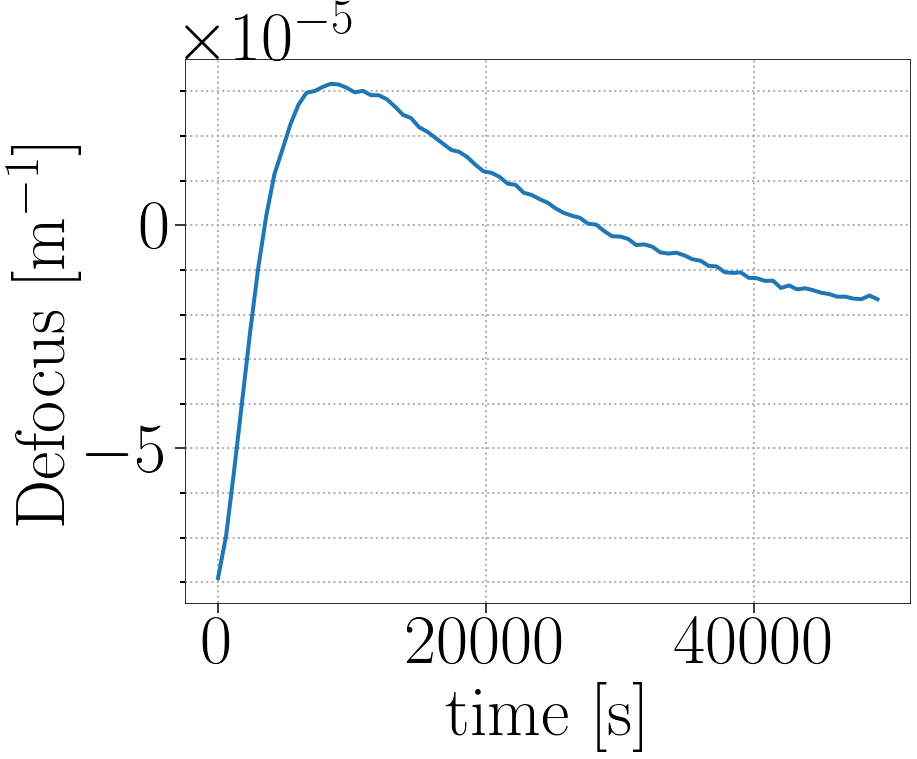

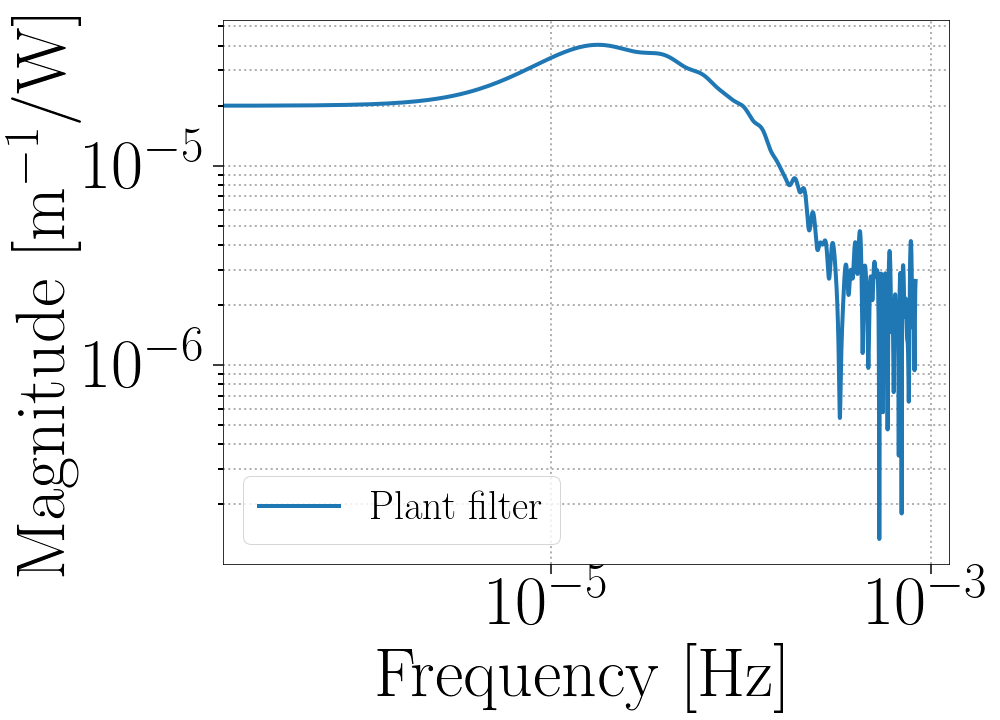

4.993706070287539e-06


In [65]:
ITMYRH_data = np.loadtxt('../data/ITMY_trend_10min_int_longer.dat')
t = np.arange(0,len(ITMYRH_data[:,0][2:]))*60.0*10.0
normalize = 3.13
print(len(t))
data_in = ITMYRH_data[:,1][2:]
b, a = signal.butter(2, .2)
#data_new = signal.filtfilt(b,a,data_in)
data_new = data_in
plt.figure()
ir = (data_new[1:] - data_new[:-1])/normalize
ir_new = ir
fig1 = plt.figure(figsize=(13,10))
plt.plot(t, data_new, label='Step response',linewidth=lin_thickness)
#plt.plot(t[:(len(t)-1)], ir, label= 'Impulse response')
plt.xlabel('time [s]')
plt.ylabel('Defocus [m$^{-1}$]')
#plt.legend(fontsize='medium')
plt.show()

Fs = 1/(t[2]-t[1])
#print(Fs)

[F,H]=signal.freqz(ir_new,1, worN=3000,whole=False) 
fig2 = plt.figure(figsize=(13,10))
plt.loglog(F*Fs/(2*np.pi), abs(H), label='Plant filter',linewidth=lin_thickness)
plt.ylabel('Magnitude [m$^{-1}$/W]')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.show()

print(max(ir_new))

In [6]:
F

array([0.00000000e+00, 1.04719755e-03, 2.09439510e-03, ...,
       3.13845106e+00, 3.13949826e+00, 3.14054546e+00])

In [8]:
adj_data = data_new + abs(min(data_new))
mod_data = np.concatenate([np.zeros((10,)), adj_data])
mod_t = np.arange(0,len(mod_data))*60.0*10.0/(3600)
mod_rh_inp = np.concatenate([np.ones((10,))*3.13, np.zeros(adj_data.shape)])

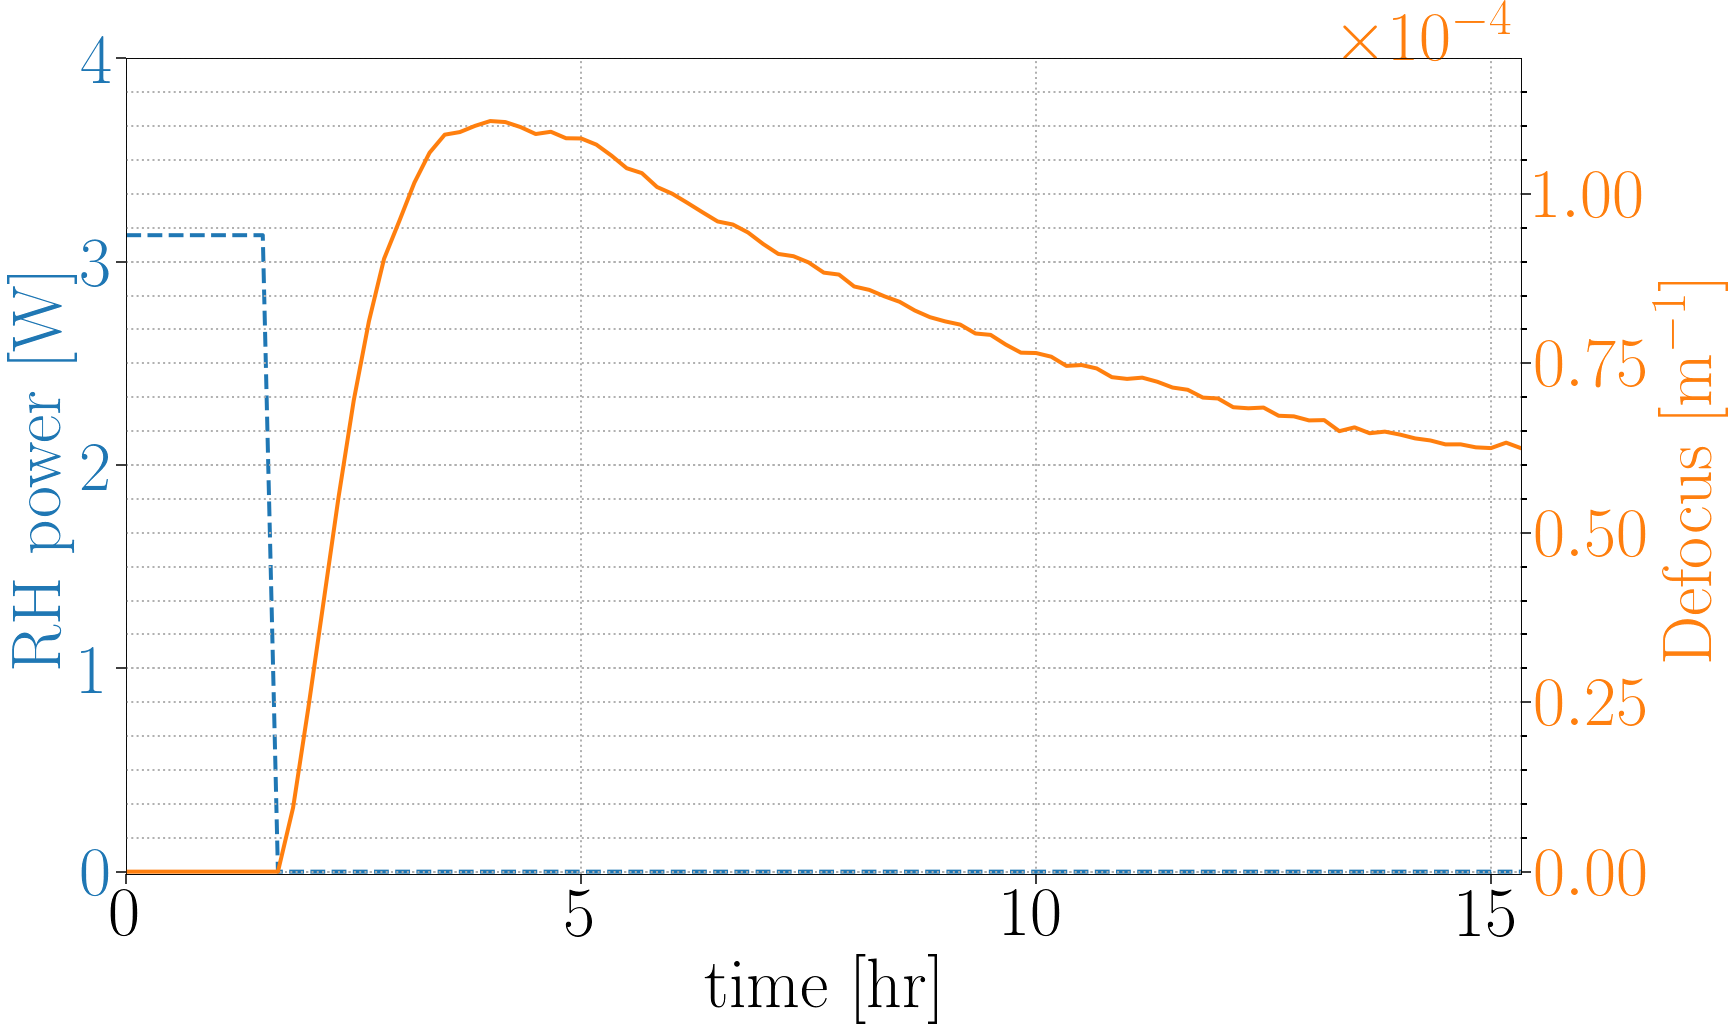

In [61]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('time [hr]') 
ax1.set_ylabel('Primary-axis') 
ax1.plot(mod_t, mod_rh_inp,'--',linewidth=lin_thickness, color = colors[0]) 
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.set_ylabel('RH power [W]', color=colors[0])
#ax1.grid(b=False,which='minor',linestyle='--')
#ax1.grid(b=False,which='major',linestyle='--')
ax1.minorticks_off()
ax1.set_xlim([0,mod_t[-1]])
ax1.set_ylim([-.01,4])

ax2 = ax1.twinx() 
ax2.plot(mod_t, mod_data,linewidth=lin_thickness, color = colors[1])
ax2.set_ylabel('Defocus [m$^{-1}$]',color= colors[1])
##plt.grid(b=True,which='minor',linestyle='--')
##plt.grid(b=True,which='major',linestyle='--')
##plt.minorticks_on()
ax2.set_xlim([0,mod_t[-1]])
ax2.tick_params(axis='y', labelcolor=colors[1])
ax2.ticklabel_format(style='sci', axis='y',scilimits=(0,-5))

ax2.set_ylim([-.003e-4,1.2e-4])

fig.savefig(thesis_dir + 'Meas_response.pdf', dpi=300, format='pdf', bbox_inches='tight')

In [7]:
print('Only plots up to the nyqist frequency: {} Hz'.format(F[-1]*Fs/(2*np.pi)))

Only plots up to the nyqist frequency: 0.0008330555555555556 Hz


/var/folders/0x/qy7b1rt11cv1zf068981fv680000gn/T/ipykernel_59035/2646953849.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,(F[-1]/(2*np.pi)*Fs)])


9.729529652779821e-12


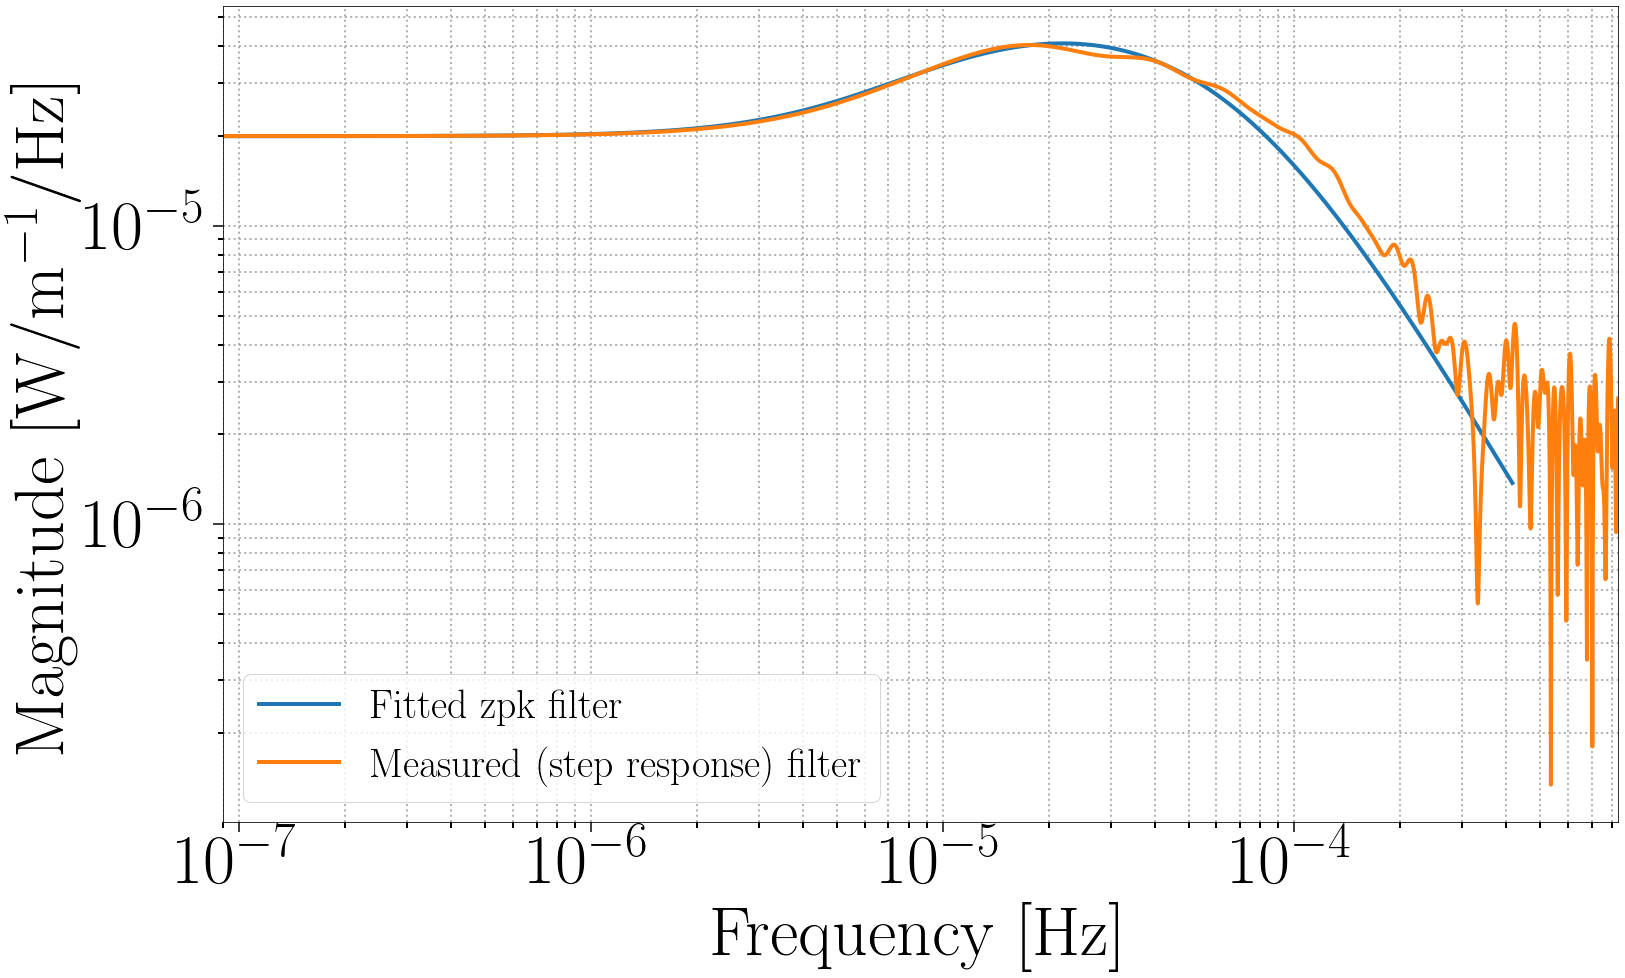

In [73]:
zeros = 5.0e-6
fit_zeros = -2.0*np.pi*5.0e-6
poles = np.array([1.3e-5, 5.0e-5 ,9.5e-5])
fit_poles = -2.0*np.pi*poles

k = 1 #This gain is not initally correct

s1 = signal.ZerosPolesGain(fit_zeros, fit_poles, k)
F_2, H_2 = signal.freqresp(s1, F*(Fs/2.0))

#[F_2,H_2] = signal.freqs(b_2, a_2)
k_new = abs(H[0])/abs(H_2[0])

plt.loglog(F_2/(2*np.pi), abs(H_2)*k_new, label='Fitted zpk filter',linewidth=lin_thickness)
plt.loglog(F/(2*np.pi)*Fs, abs(H), label='Measured (step response) filter',linewidth=lin_thickness)
plt.ylabel('Magnitude [W/m$^{-1}/\mathrm{Hz}$]')
plt.xlabel('Frequency [Hz]')
plt.legend()
#plt.title('RH plant filter (H(s))')
plt.xlim([0,(F[-1]/(2*np.pi)*Fs)])
print(k_new) #Spit out the new gain
##plt.grid(b=True,which='minor')
##plt.grid(b=True,which='major')
##plt.minorticks_on()

model_zpk = signal.ZerosPolesGain(fit_zeros, fit_poles,k_new)

plt.savefig(thesis_dir+'RH_plant_filter_fit.pdf',bbox_inches = 'tight')

## Now to invert the plant filter (just swapping the poles and the zeros and inverting gain) (H$^{-1}$(s))

/var/folders/0x/qy7b1rt11cv1zf068981fv680000gn/T/ipykernel_59035/1155100985.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, F_3[-1]/(2*np.pi)])


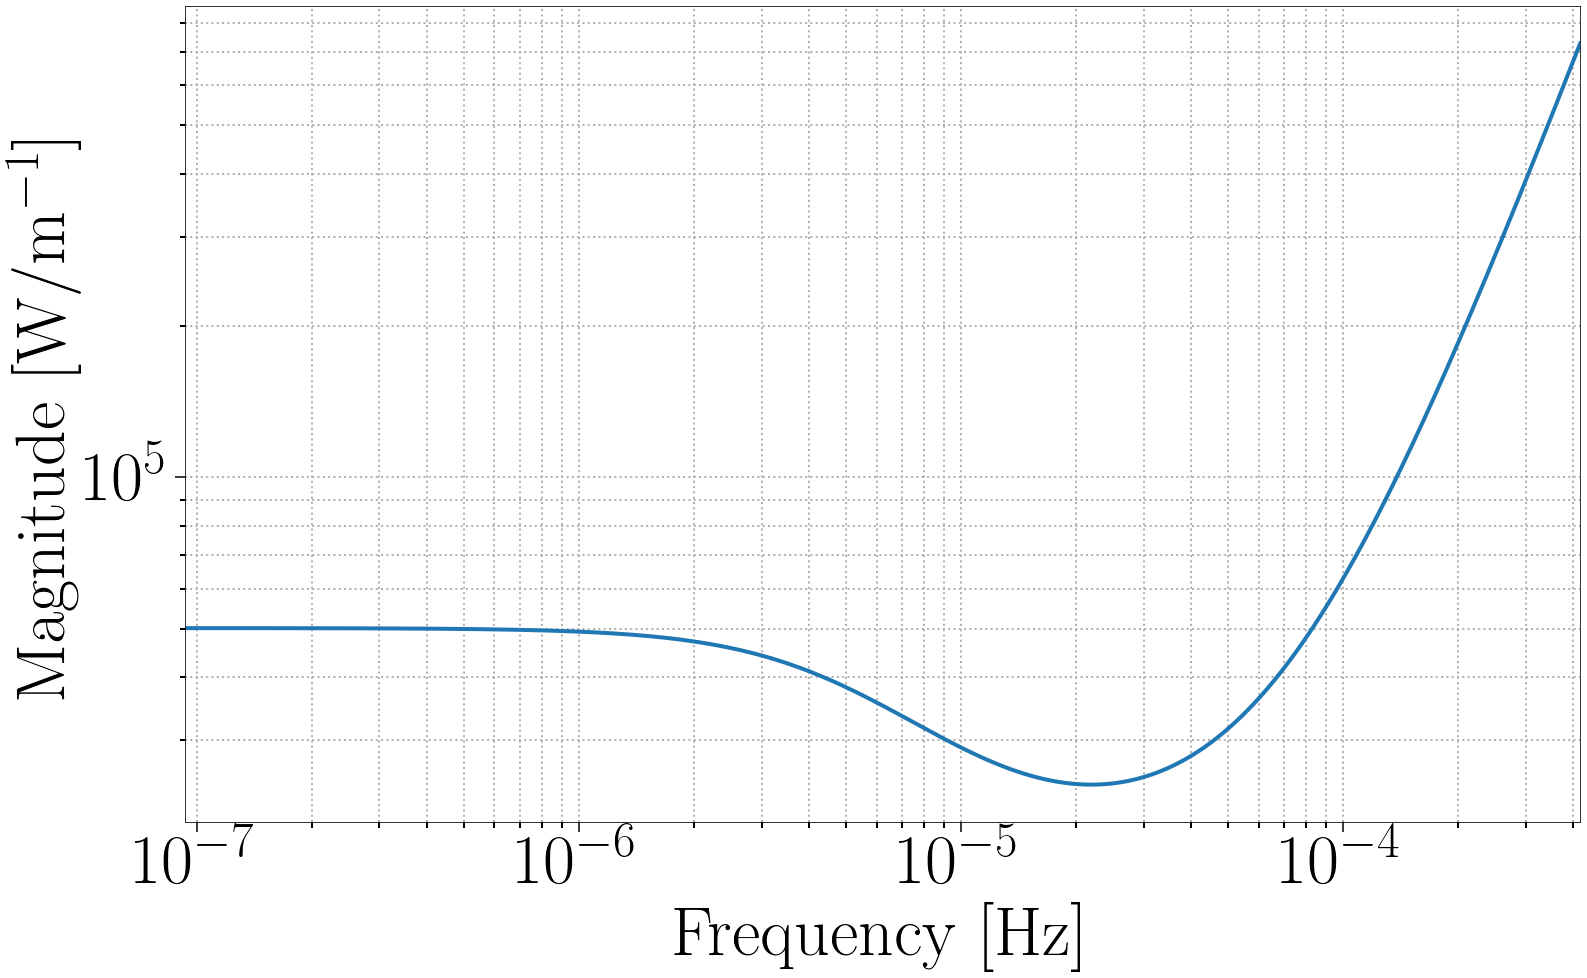

In [99]:
inv_model = signal.ZerosPolesGain(fit_poles, fit_zeros,1/k_new)
F_3, H_3 = signal.freqresp(inv_model, F*(Fs/2.0))
fig4 = plt.figure()
plt.loglog(F_3/(2*np.pi), abs(H_3), label='Fitted zpk Filter',linewidth=lin_thickness)
plt.ylabel('Magnitude [W/m$^{-1}$]')
plt.xlabel('Frequency [Hz]')
#plt.title('RH inverse filter ([H(s)]$^{-1}$)')
plt.xlim([0, F_3[-1]/(2*np.pi)])
###plt.grid(b=True,which='minor',linestyle='--')
##plt.grid(b=True,which='major',linestyle='--')
#plt.minorticks_on()
plt.savefig(thesis_dir+'RH_inv_filt.pdf',bbox_inches = 'tight')

## Stabilize the high frequencies to DC (Generating H$^{-1}$ (s) * G$_{n}$(s)) 
Will also attempt to reduce the time constant

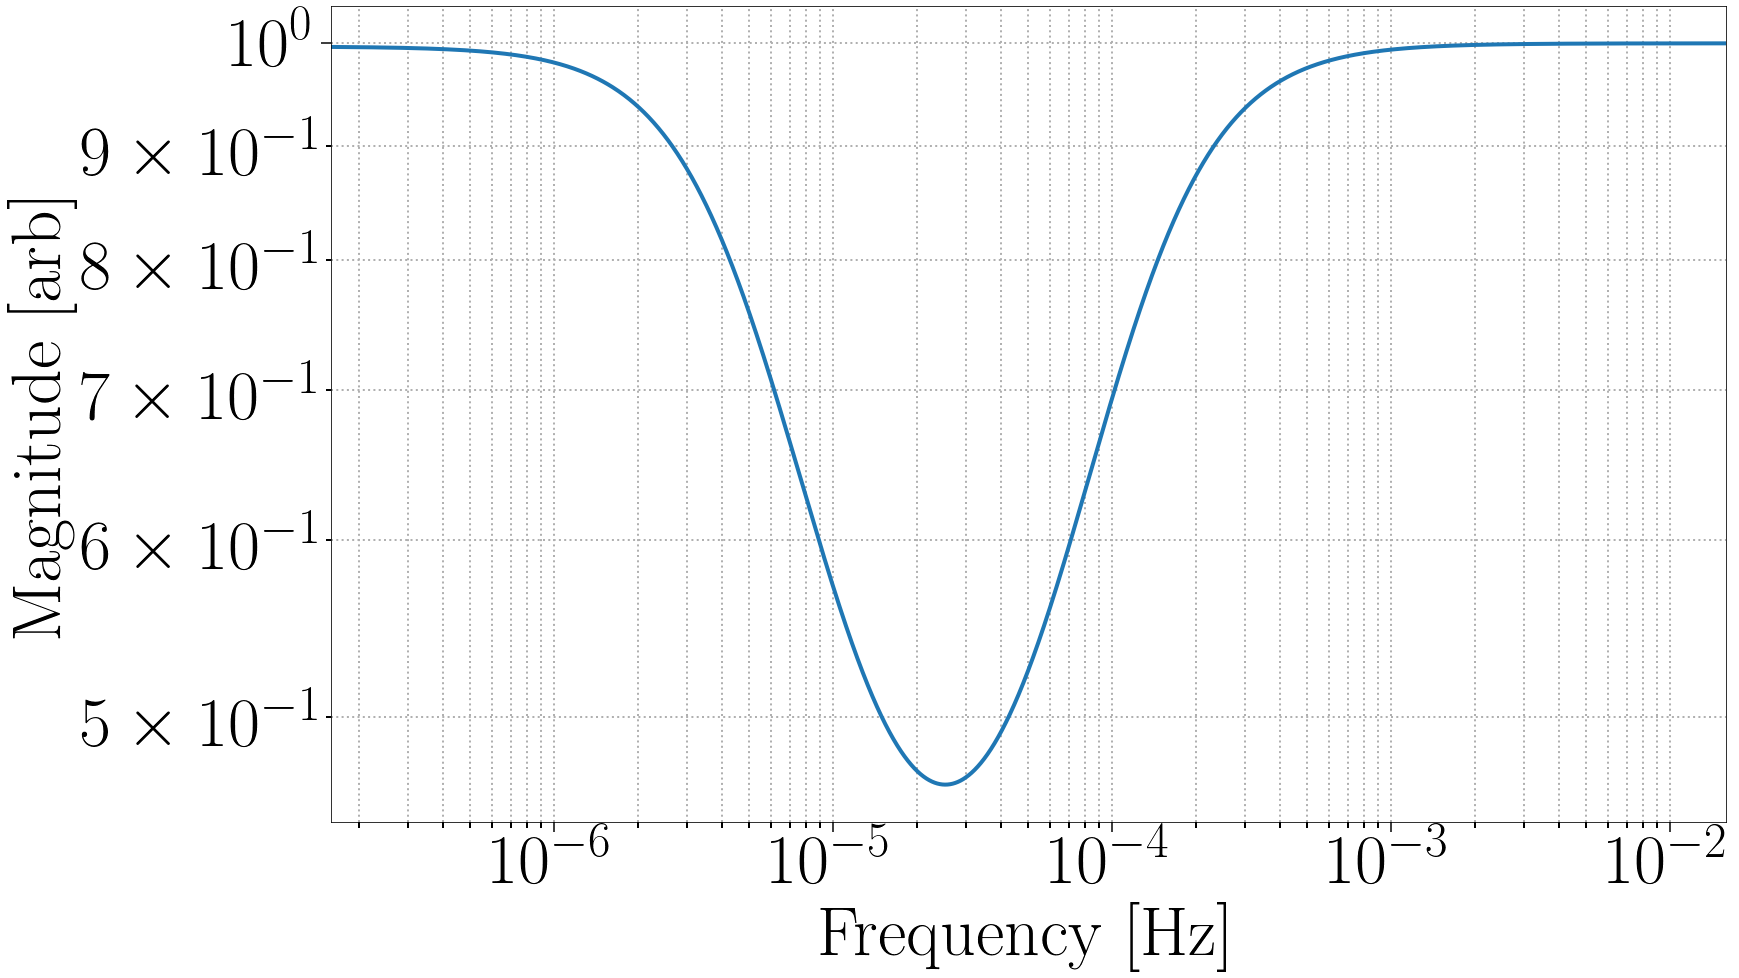

In [100]:
#pole_test = .0001113 + 1e-4
Hinv_G_1_filt = signal.ZerosPolesGain(fit_poles, [fit_zeros,-2.0*np.pi*.0001113129672, -2.0*np.pi*.0001113129672],1)
pole_shift = 3
Hinv_G_2_filt = signal.ZerosPolesGain(fit_poles, [fit_zeros,-2.0*np.pi*.0001113129672*pole_shift, -2.0*np.pi*.0001113129672*pole_shift],1)

## Plotting
freq = np.arange(10e-7,10e-2,1e-7)
F_4, H_4 = signal.freqresp(Hinv_G_1_filt,freq)
F_5, H_5 = signal.freqresp(Hinv_G_2_filt,freq)

fig5= plt.figure()
plt.loglog(F_4/(2*np.pi), abs(H_4), label='RH input filter',linewidth=lin_thickness)
#plt.loglog(F_5/(2*np.pi), abs(H_5), label='Livingston filter',linewidth=lin_thickness)
#plt.legend(fontsize='xx-large')
plt.xlim([F_4[0]/(2*np.pi),F_4[-1]/(2*np.pi)])
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
##plt.minorticks_on()
plt.ylabel('Magnitude [arb]')
plt.xlabel('Frequency [Hz]')
#plt.title('Real-time RH filter [H(s)]$^{-1*}$', **title_font)

plt.savefig(thesis_dir+'RH_input_filt.pdf',bbox_inches='tight')

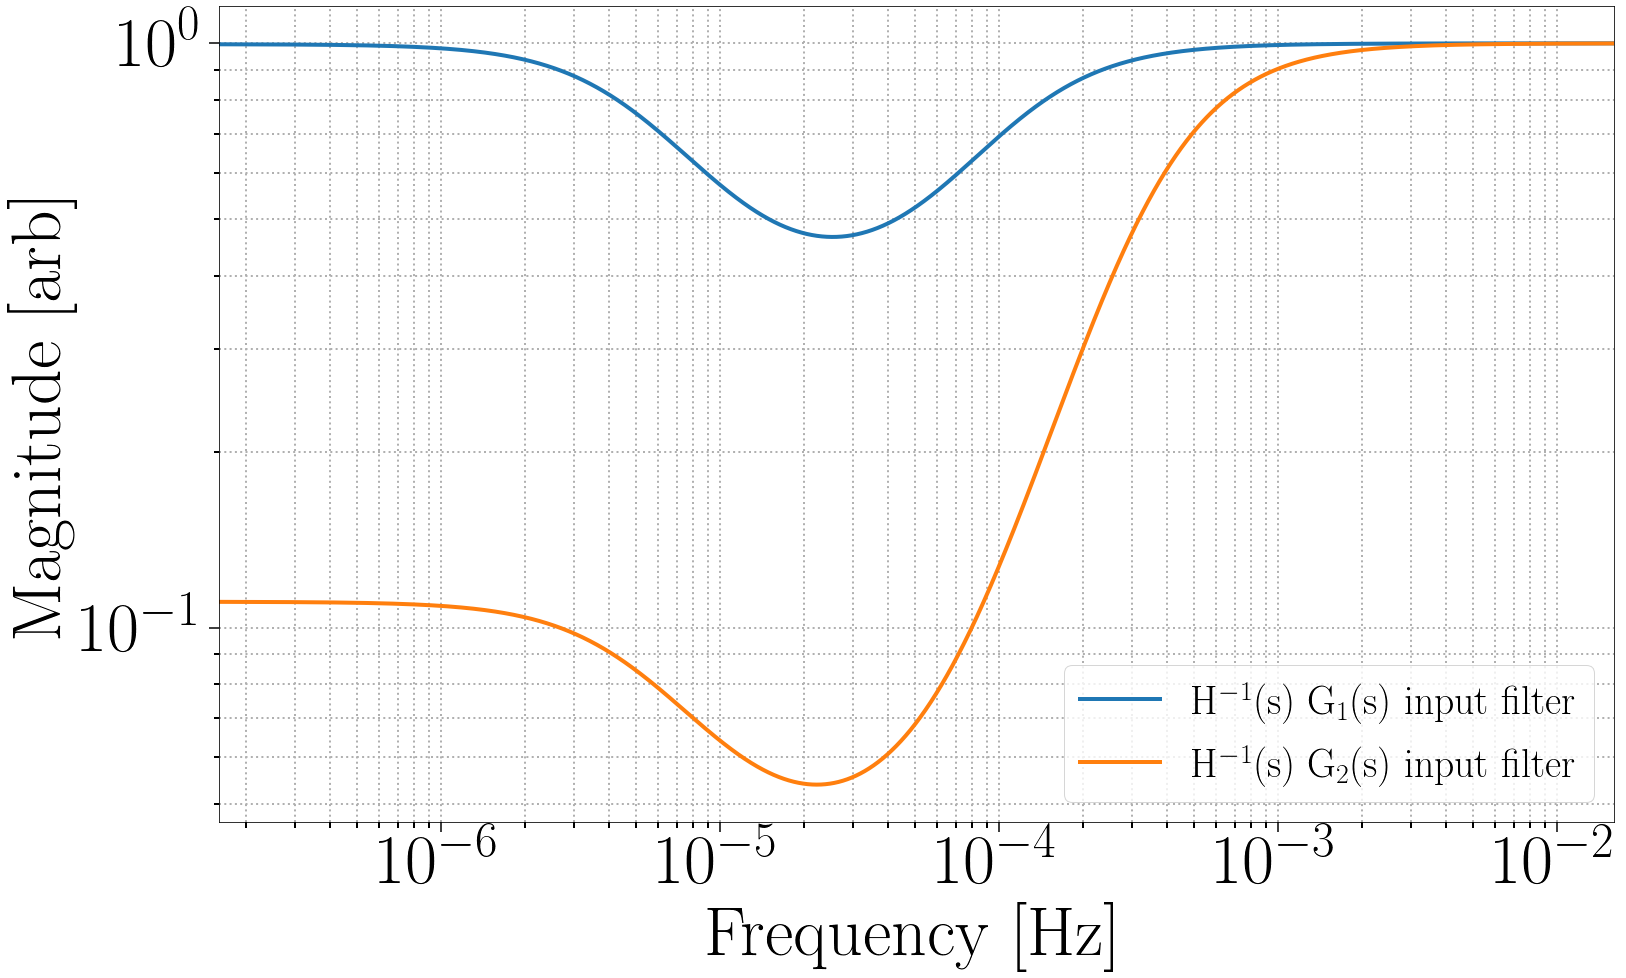

In [101]:
fig79= plt.figure()
plt.loglog(F_4/(2*np.pi), abs(H_4), label='H$^{-1}$(s) G$_1$(s) input filter',linewidth=lin_thickness)
plt.loglog(F_5/(2*np.pi), abs(H_5), label='H$^{-1}$(s) G$_2$(s) input filter',linewidth=lin_thickness)
plt.legend()
plt.xlim([F_4[0]/(2*np.pi),F_4[-1]/(2*np.pi)])
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
#plt.minorticks_on()
plt.ylabel('Magnitude [arb]')
plt.xlabel('Frequency [Hz]')
#plt.title('Real-time RH filter [H(s)]$^{-1*}$', **title_font)

plt.savefig(thesis_dir+'RH_input_filt_G1_G2.pdf',bbox_inches='tight')

# COMSOL self heating filter

## Import COMSOL self heating data

In [79]:
COM_data = np.loadtxt('../data/1W_self_heating_defocus_doublepass.txt')
t_com = COM_data[:,0]*3600
defocus = COM_data[:,1]/max(COM_data[:,1])

1.0

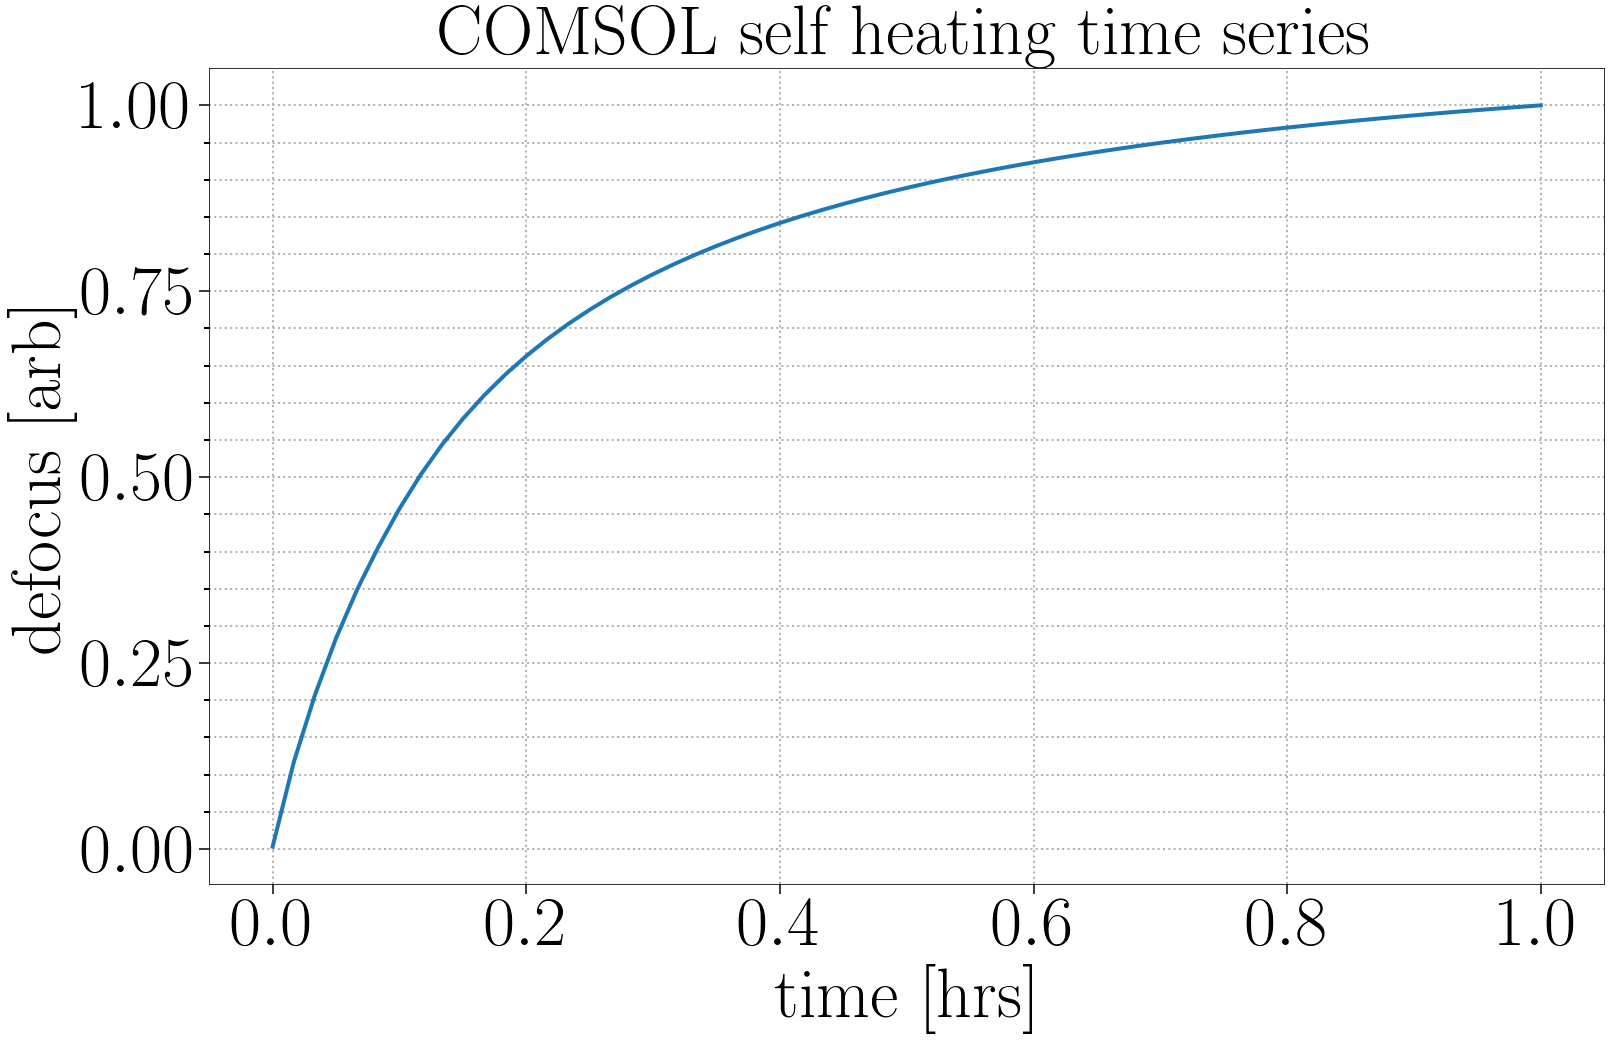

In [103]:
fig6 = plt.figure()
plt.plot(t_com/3600,defocus,linewidth=lin_thickness)
plt.title('COMSOL self heating time series')
plt.xlabel('time [hrs]')
plt.ylabel('defocus [arb]')
max(defocus)

In [81]:
ir_com  = (defocus[1:] - defocus[:-1])
t_ir = t_com[:((len(t_com)-1))]

In [82]:
[F_ir,H_ir]=signal.freqz(ir_com, 1, worN=3000,whole=False) 
Fs_com =1/(t_com[1]-t_com[0])

Text(0.5, 1.0, 'Self Heating filter (G$_{2}$(s))')

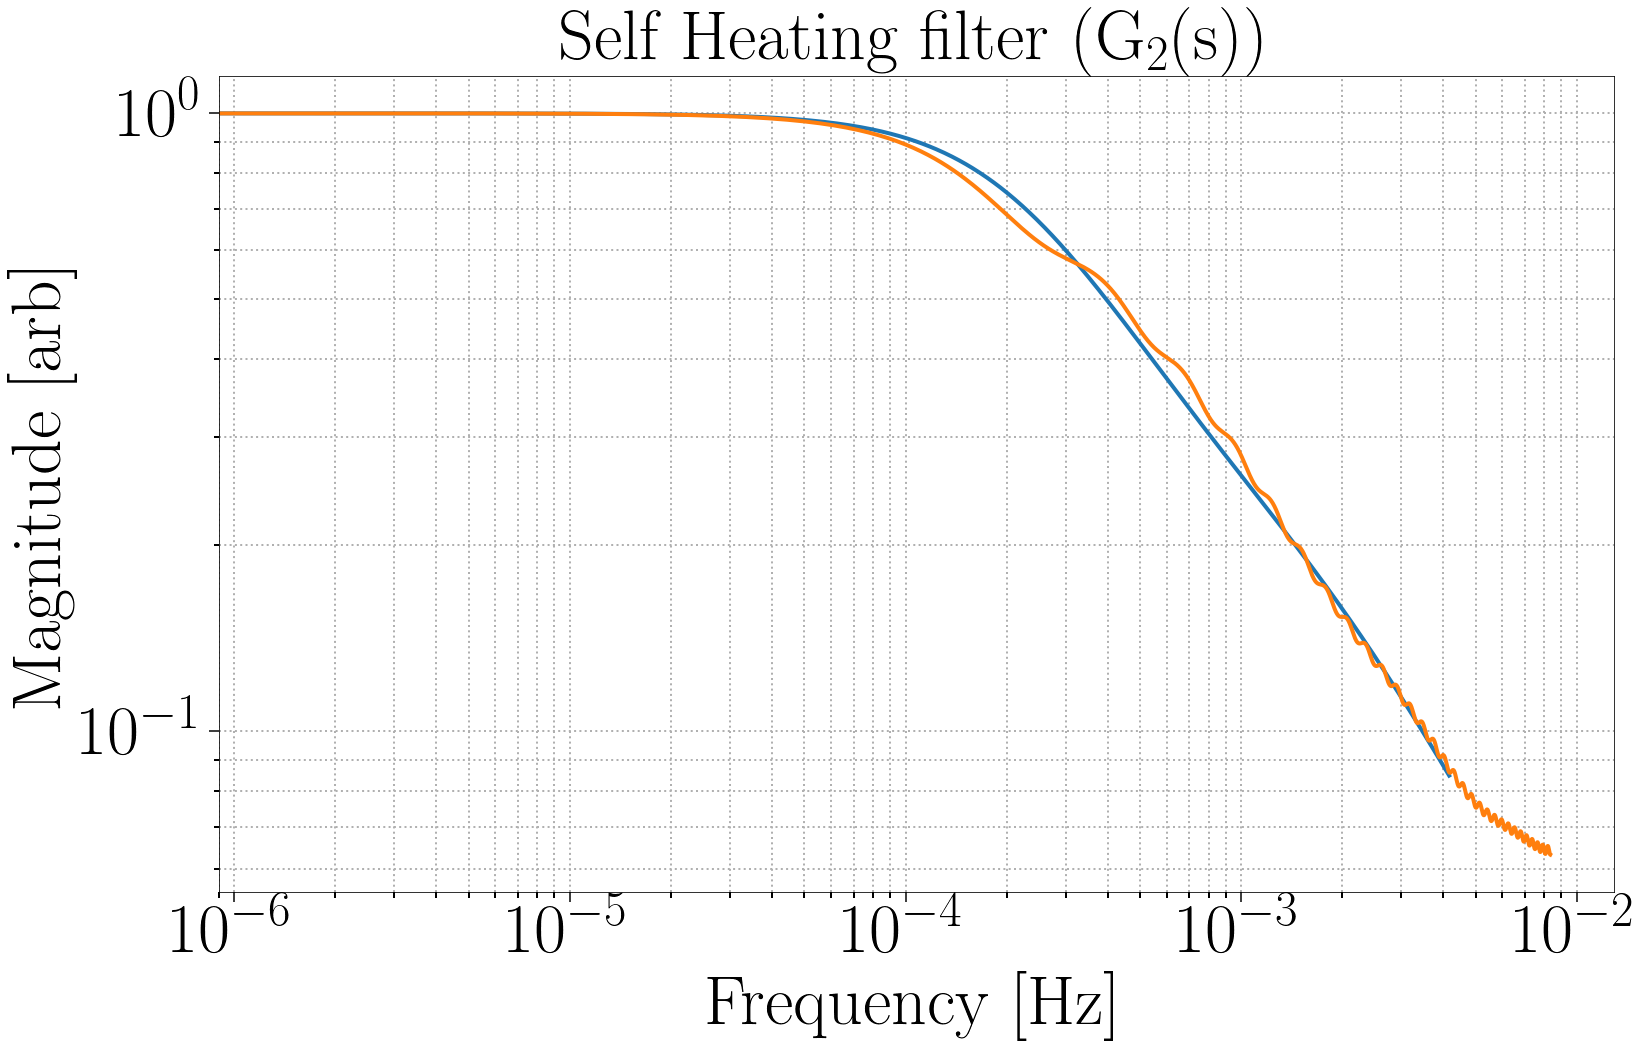

In [104]:
zeros_com = np.array([.9e-3,.3e-3])
fit_zeros_com = -2.0*np.pi*zeros_com
poles_com = np.array([.25e-3,.25e-3,1.6e-3])
fit_poles_com = -2.0*np.pi*poles_com

k_com =1 #This gain is not initally correct

zpk_com = signal.ZerosPolesGain(fit_zeros_com, fit_poles_com, k_com)
F_com, H_com = signal.freqresp(zpk_com, F_ir*(Fs_com/2.0))
k_new_com = abs(H_ir[0])/abs(H_ir[0]*H_com[0])

fig6 = plt.figure()
plt.loglog(F_com/(2*np.pi), abs(H_com)*k_new_com, label='Fitted zpk Filter',linewidth=lin_thickness)
plt.loglog(F_ir*Fs_com/(2*np.pi), abs(H_ir)/abs(H_ir[0]), label='Plant filter',linewidth=lin_thickness)
plt.ylabel('Magnitude [arb]')
plt.xlabel('Frequency [Hz]')
plt.title('Self Heating filter (G$_{2}$(s))')


In [84]:
G_2 = signal.ZerosPolesGain(fit_zeros_com, fit_poles_com, k_new_com)
unit_step_testing = np.zeros(np.shape(t_com))
unit_step_testing[t_com>0] = 1
[ _ ,y_self_test, _] = signal.lsim(G_2, unit_step_testing, t_com)

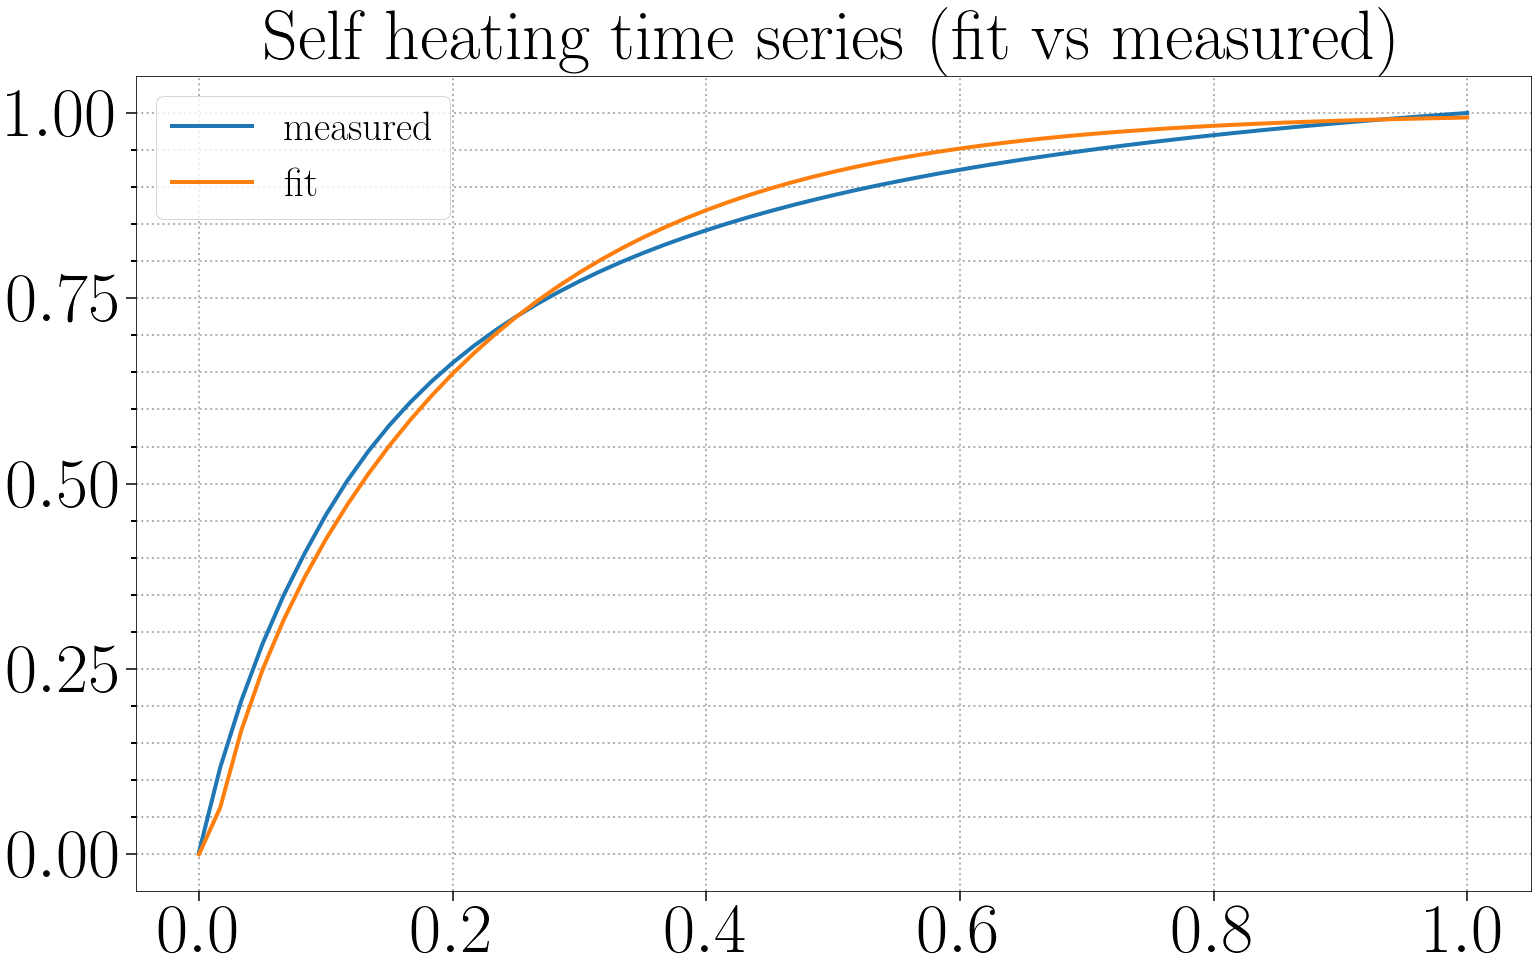

In [105]:
fig7= plt.figure()
plt.plot(t_com/3600,defocus,label='measured',linewidth=lin_thickness)
plt.plot(t_com/3600,y_self_test,label='fit',linewidth=lin_thickness)
plt.title('Self heating time series (fit vs measured)')
plt.legend()

# Generating time series

#### Step input time series

In [87]:
unit_step = np.zeros((t.shape[0]*30))
t_new = np.arange(0,len(unit_step))*60.0*1.0
## Generating simulated response
unit_step[t_new>9000] = 1
[t_mod_new,y_mod_sim,xout] = signal.lsim(model_zpk, unit_step, t_new)

#### Conditioned input time series

In [88]:
unit_step2 = np.zeros((t.shape[0]*30))
unit_step2[t_new>(9000)] = pole_shift**2

[ _ ,y_inp_inv_L, _] = signal.lsim(Hinv_G_2_filt, unit_step2, t_new)
[ _ ,y_inp_inv_H, _] = signal.lsim(Hinv_G_1_filt, unit_step, t_new)
[ _ ,y_mod_sim_inv_L, _] = signal.lsim(model_zpk, y_inp_inv_L, t_new)
[ _ ,y_mod_sim_inv_H, _] = signal.lsim(model_zpk, y_inp_inv_H, t_new)

#### Self heating time series

In [89]:
unit_step3 = np.zeros((t.shape[0]*30))
t_offset =0
unit_step3[t_new>(9000+t_offset)] = 1

In [90]:
[ _ ,y_sh_resp, _] = signal.lsim(G_2, unit_step3, t_new)

#### Basic Performance

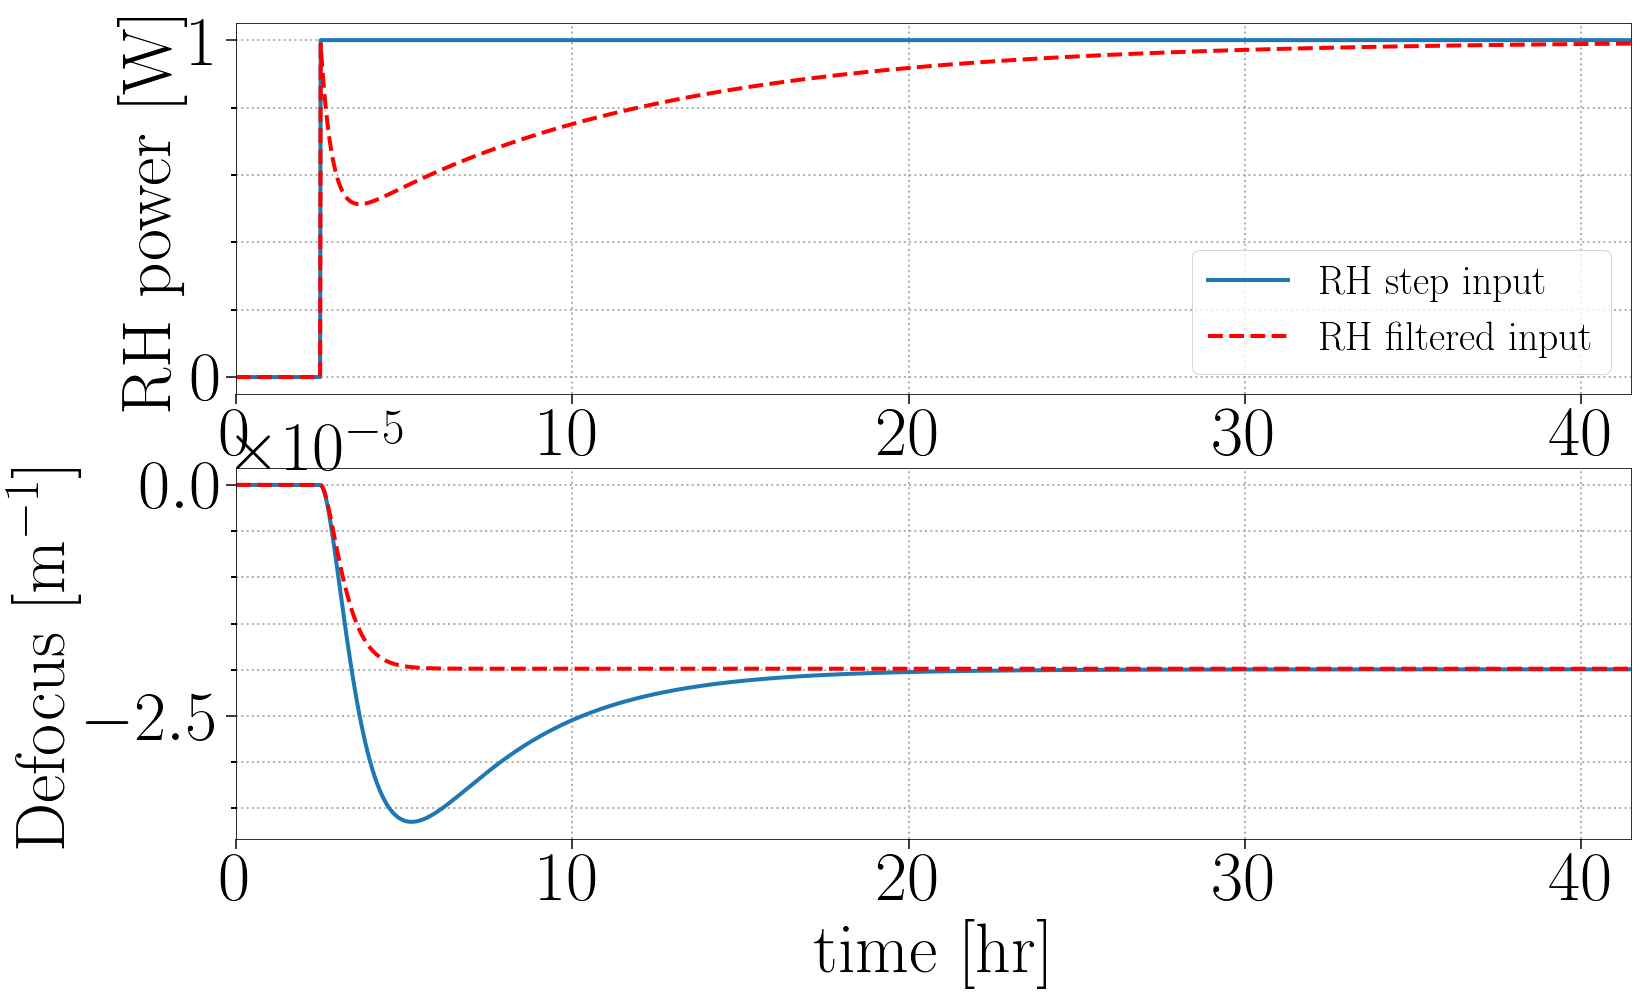

In [107]:
fig = plt.figure()
plt.subplot(211)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='RH step input')
plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='RH filtered input')
plt.ylabel('RH power [W]')
#plt.title('RH step input vs. Filtered input')
plt.legend()
plt.xlim([0, t_new[-1]/3600])
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
#plt.minorticks_on()
plt.subplot(212)
plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'RH step input')
plt.plot(t_new/3600,-y_mod_sim_inv_H,'--', linewidth = lin_thickness,color='red',label ='RH filtered input')
plt.ylabel('Defocus [m$^{-1}$]')
plt.xlabel('time [hr]')
#plt.legend()
plt.xlim([0, t_new[-1]/3600])
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
#plt.minorticks_on()
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,-5))
fig.savefig(thesis_dir+'IRHF_step_vs_filt_step.pdf',bbox_inches='tight')

#### All curves together

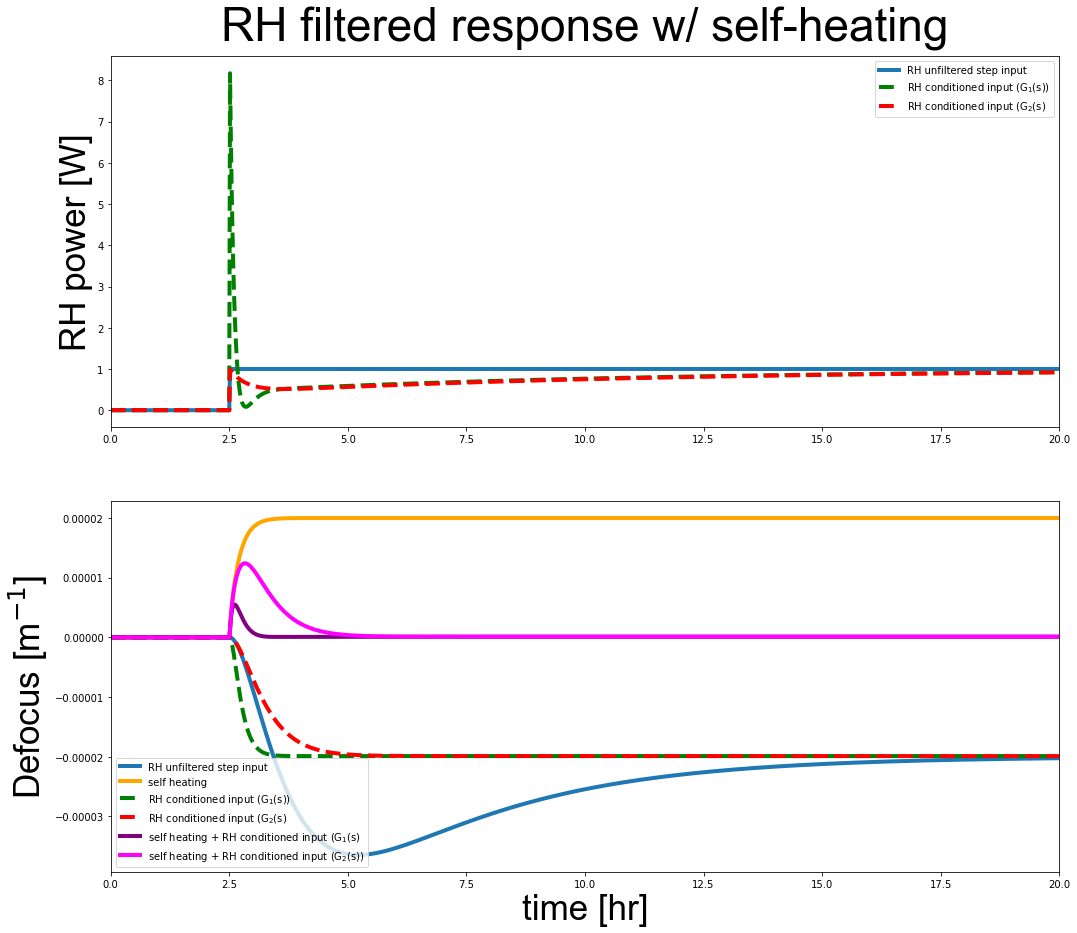

In [23]:
fig = plt.figure()
plt.subplot(211)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='RH unfiltered step input')
plt.plot(t_new/3600, y_inp_inv_L,'--', linewidth = lin_thickness, color = 'green',label='RH conditioned input (G$_{1}$(s))')
plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='RH conditioned input (G$_{2}$(s)')
plt.ylabel('RH power [W]')
plt.title('RH filtered response w/ self-heating')
plt.legend(fontsize='medium')
plt.xlim([0,20])
plt.subplot(212)
plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'RH unfiltered step input')
plt.plot(t_new/3600,y_sh_resp*20e-6, linewidth = lin_thickness,color='orange',label ='self heating')
plt.plot(t_new/3600,-y_mod_sim_inv_L,'--', linewidth = lin_thickness,color='green',label ='RH conditioned input (G$_{1}$(s))')
plt.plot(t_new/3600,-y_mod_sim_inv_H,'--', linewidth = lin_thickness,color='red',label ='RH conditioned input (G$_{2}$(s)')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_L,linewidth = lin_thickness,label='self heating + RH conditioned input (G$_{1}$(s)',color='purple')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_H,linewidth = lin_thickness,label='self heating + RH conditioned input (G$_{2}$(s))',color='magenta')
plt.ylabel('Defocus [m$^{-1}$]')
plt.xlabel('time [hr]')
plt.legend(fontsize='medium')
plt.xlim([0,20])
fig.savefig(thesis_dir+'IRHF_compare_self_w_filter_compare.pdf',bbox_inches='tight')

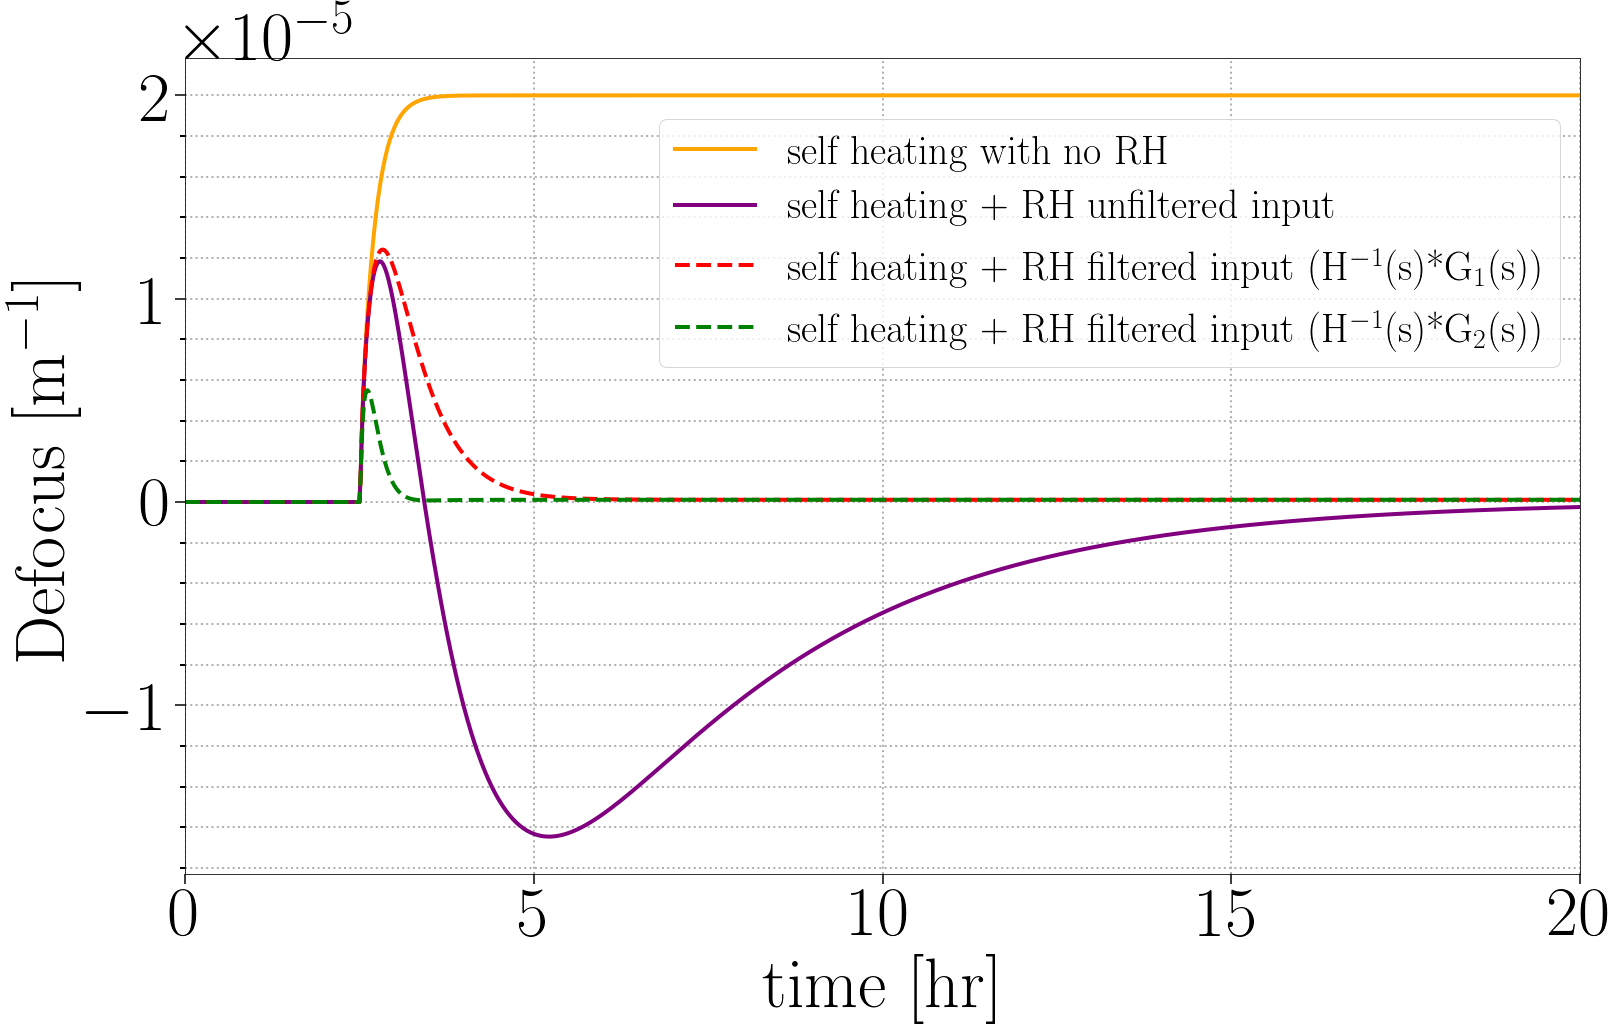

In [116]:
fig8 = plt.figure()
plt.rc('font', size=25)
#plt.subplot(211)
#plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='RH unfiltered step input')
#plt.plot(t_new/3600, y_inp_inv_L,'--', linewidth = lin_thickness, color = 'green',label='RH conditioned input (G$_{1}$(s))')
#plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='RH conditioned input (G$_{2}$(s)')
#plt.ylabel('RH power [W]')
#plt.title('Comparison with central self heating')
#plt.legend(fontsize='xx-large')
#plt.subplot(212)
#plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'RH unfiltered step input')
plt.plot(t_new/3600,y_sh_resp*20e-6, linewidth = lin_thickness,color='orange',label ='self heating with no RH')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim,linewidth = lin_thickness,label='self heating + RH unfiltered input',color='purple')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_H,'--',linewidth = lin_thickness,label='self heating + RH filtered input (H$^{-1}$(s)*G$_{1}$(s))',color='red')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_L,'--',linewidth = lin_thickness,label='self heating + RH filtered input (H$^{-1}$(s)*G$_{2}$(s))',color='green')
#plt.plot(t_new/3600,-y_mod_sim_inv_L,'--', linewidth = lin_thickness,color='green',label ='RH conditioned input (G$_{1}$(s))')
#plt.plot(t_new/3600,-y_mod_sim_inv_H,'--', linewidth = lin_thickness,color='red',label ='RH conditioned input (G$_{2}$(s))')
plt.ylabel('Defocus [m$^{-1}$]')
plt.xlabel('time [hr]')
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,-5))
plt.xlim([0,20])
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
#plt.minorticks_on()
plt.legend(loc='upper right',bbox_to_anchor=(1.0,.95))
fig8.savefig(thesis_dir+'IRHF_compare_w_self.pdf',bbox_inches='tight')

## Set RH upper limit

In [25]:
upper_lim = np.ones(np.shape(t_new))*40

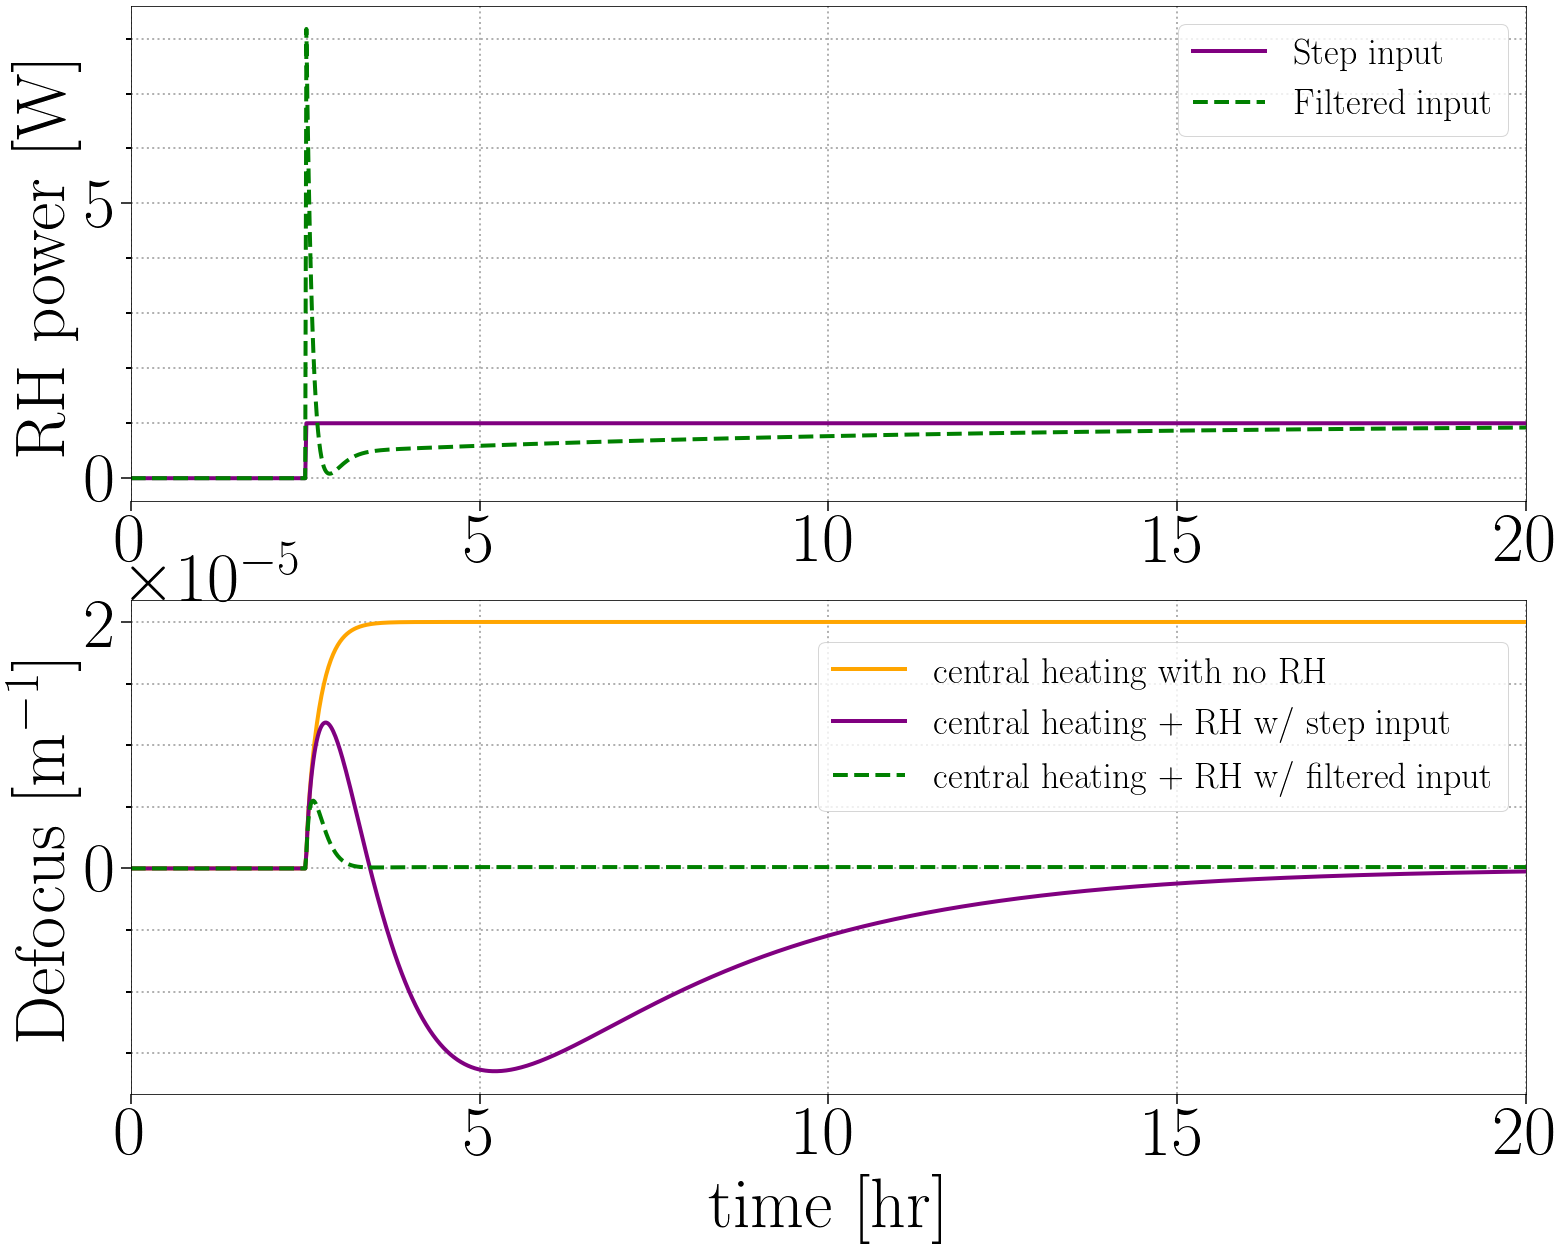

In [115]:
fig9= plt.figure(figsize=(25,20))
plt.rc('font', size=30)
plt.subplot(211)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='Step input', color= 'purple')
plt.plot(t_new/3600, y_inp_inv_L,'--', linewidth = lin_thickness, color = 'green',label='Filtered input')
#plt.plot(t_new/3600, upper_lim,':',linewidth = lin_thickness, color='magenta', label='RH upper limit')
#plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='Filtered input (H$^{-1}$(s)G$_{1}$(s))')
#plt.minorticks_on()
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
plt.ylabel('RH power [W]')
plt.xlim([0,20])
#plt.title('RH responses')
plt.legend(fontsize='large')
plt.subplot(212)
plt.ylabel('Defocus [m$^{-1}$]')
plt.plot(t_new/3600,y_sh_resp*20e-6, linewidth = lin_thickness,color='orange',label ='central heating with no RH')
plt.plot(t_new/3600,(y_sh_resp*20e-6 -y_mod_sim),linewidth = lin_thickness,label='central heating + RH w/ step input',color='purple')
plt.plot(t_new/3600,(y_sh_resp*20e-6 -y_mod_sim_inv_L),'--',linewidth = lin_thickness,label='central heating + RH w/ filtered input',color='green')
#plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'Unfiltered step input',color='purple')
#plt.plot(t_new/3600,y_sh_resp*20e-6-y_mod_sim_inv_L,'--', linewidth = lin_thickness,color='green',label ='Filtered input (H$^{-1}$(s)G$_{2}$(s))')
#plt.plot(t_new/3600,-y_mod_sim_inv_H,'--', linewidth = lin_thickness,color='red',label ='Filtered input (H$^{-1}$(s)G$_{1}$(s))')
#plt.minorticks_on()
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
plt.xlabel('time [hr]')
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,-5))
plt.legend(loc='upper right', bbox_to_anchor=(1.0,.95),fontsize='large')
plt.xlim([0,20])

fig9.savefig(thesis_dir+'IRHF_compare_filts_PI_paper.pdf',bbox_inches='tight')

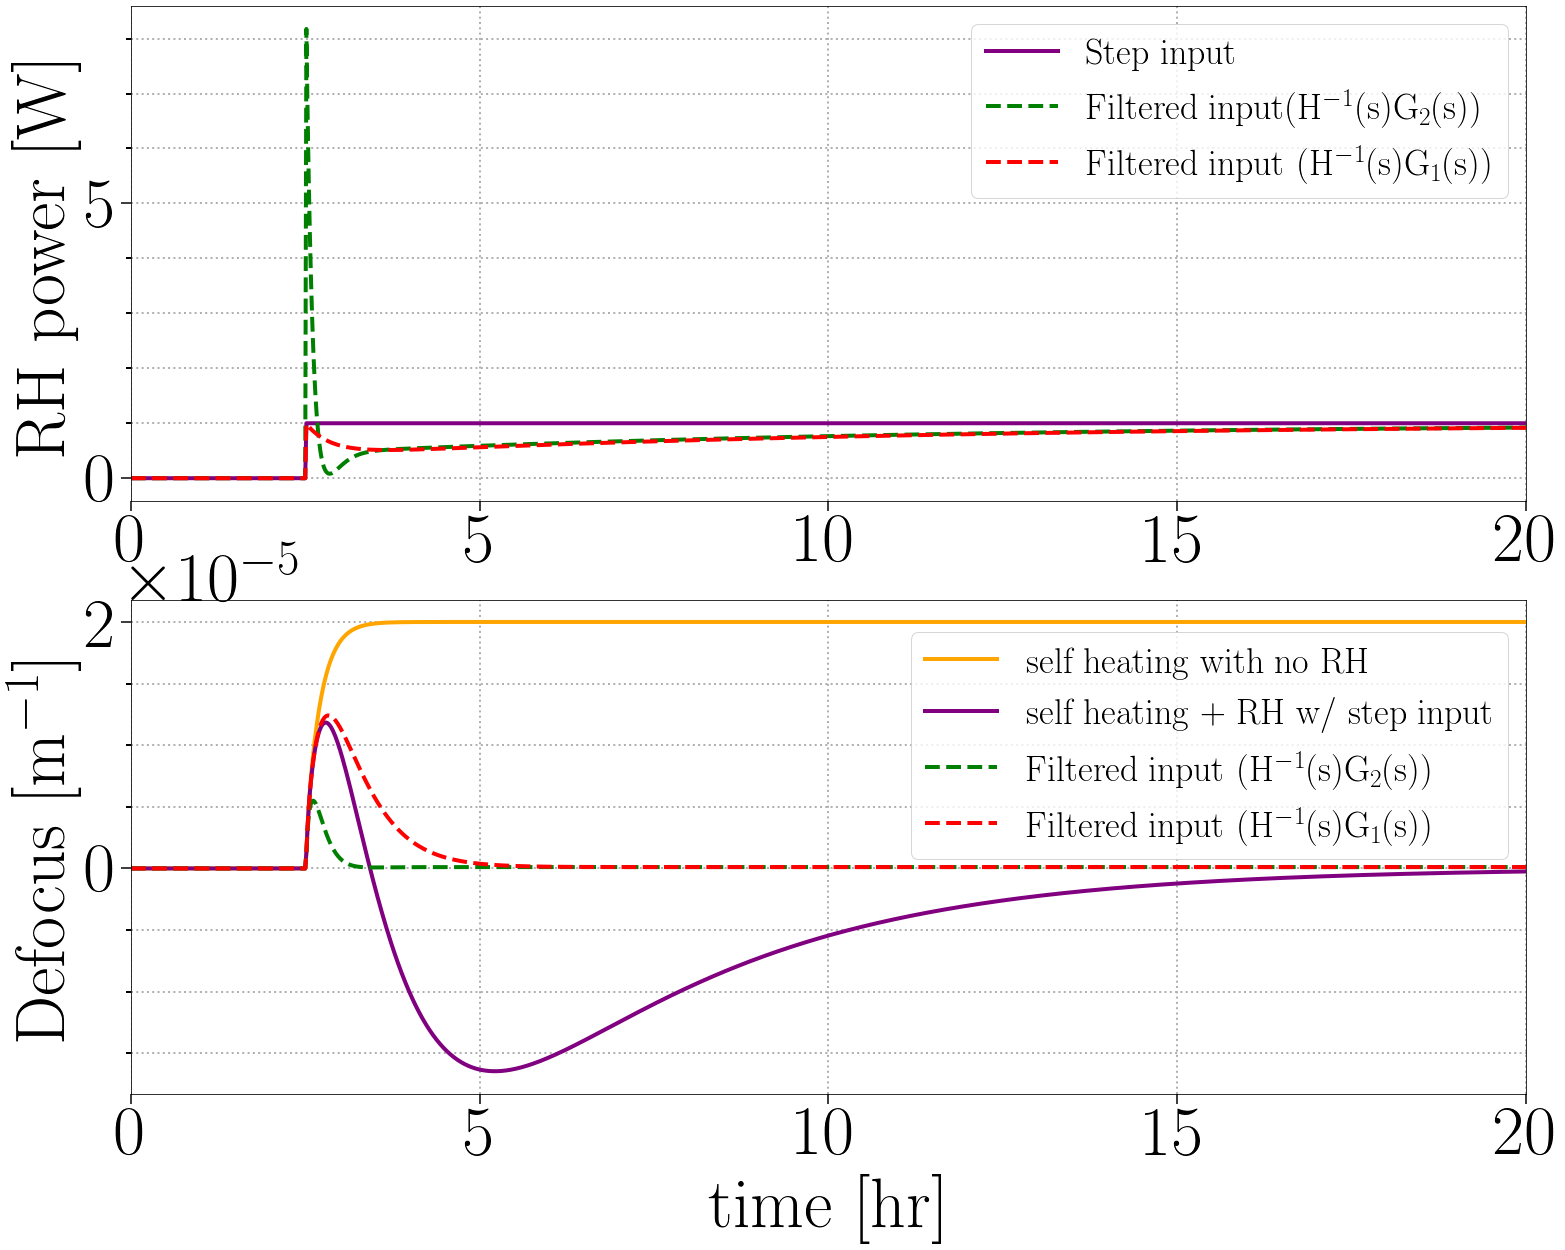

In [119]:
fig9= plt.figure(figsize=(25,20))
plt.rc('font', size=30)
plt.subplot(211)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='Step input', color= 'purple')
#plt.plot(t_new/3600, upper_lim,':',linewidth = lin_thickness, color='magenta', label='RH upper limit')
plt.plot(t_new/3600, y_inp_inv_L,'--', linewidth = lin_thickness, color = 'green',label='Filtered input(H$^{-1}$(s)G$_{2}$(s))')
plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='Filtered input (H$^{-1}$(s)G$_{1}$(s))')
#plt.minorticks_on()
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
plt.ylabel('RH power [W]')
plt.xlim([0,20])
#plt.title('RH responses')
plt.legend(fontsize='large')
plt.subplot(212)
plt.ylabel('Defocus [m$^{-1}$]')
plt.plot(t_new/3600,y_sh_resp*20e-6, linewidth = lin_thickness,color='orange',label ='self heating with no RH')
plt.plot(t_new/3600,(y_sh_resp*20e-6 -y_mod_sim),linewidth = lin_thickness,label='self heating + RH w/ step input',color='purple')
#plt.plot(t_new/3600,(y_sh_resp*20e-6 -y_mod_sim_inv_L),'--',linewidth = lin_thickness,label='self heating + RH w/ filtered input',color='green')
#plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'Unfiltered step input',color='purple')
plt.plot(t_new/3600,(y_sh_resp*20e-6-y_mod_sim_inv_L),'--', linewidth = lin_thickness,color='green',label ='Filtered input (H$^{-1}$(s)G$_{2}$(s))')
plt.plot(t_new/3600,(y_sh_resp*20e-6-y_mod_sim_inv_H),'--', linewidth = lin_thickness,color='red',label ='Filtered input (H$^{-1}$(s)G$_{1}$(s))')
#plt.minorticks_on()
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
plt.xlabel('time [hr]')
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,-5))
plt.legend(loc='upper right', bbox_to_anchor=(1.0,.97),fontsize='large')
plt.xlim([0,20])

fig9.savefig(thesis_dir+'IRHF_compare_filts.pdf',bbox_inches='tight')
fig9.savefig(thesis_dir+'IRHF_compare_filts.pdf',bbox_inches='tight')

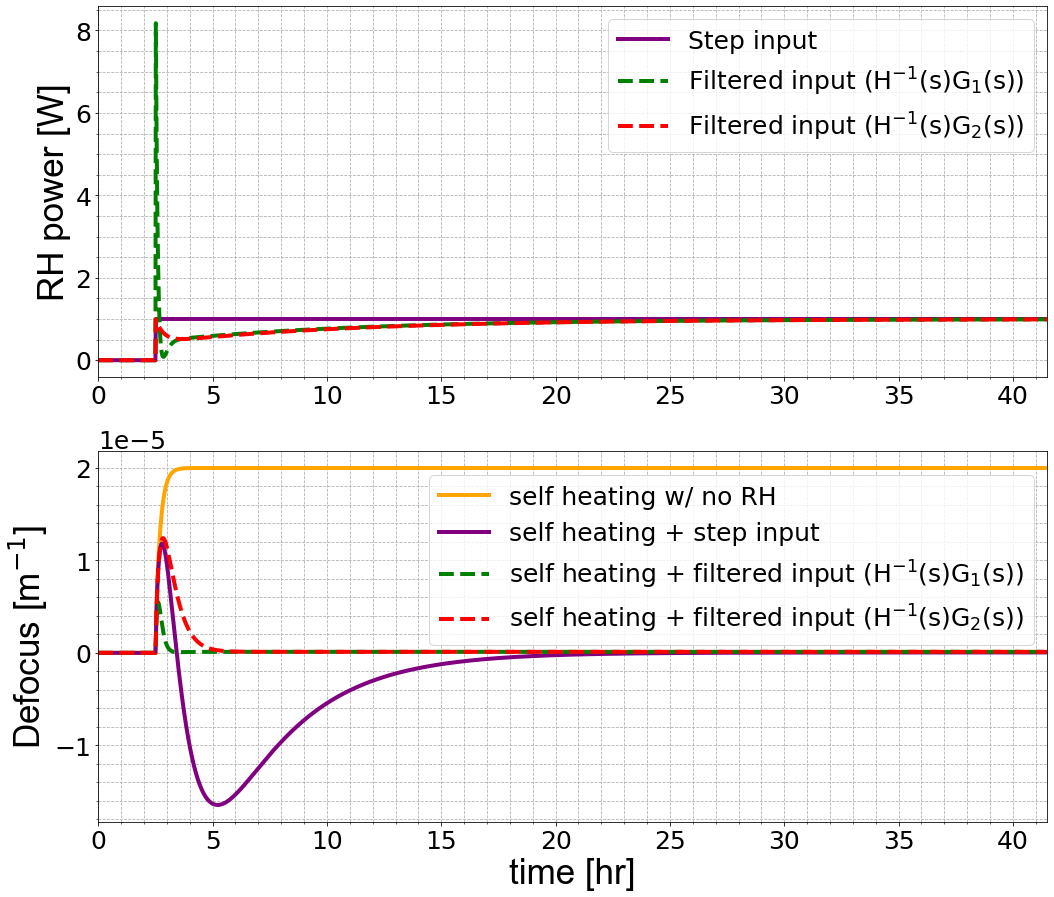

In [200]:
fig9= plt.figure(figsize=(17,15))
plt.rc('font', size=25)
plt.subplot(211)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='Step input', color= 'purple')
plt.plot(t_new/3600, y_inp_inv_L,'--', linewidth = lin_thickness, color = 'green',label='Filtered input (H$^{-1}$(s)G$_{1}$(s))')
#plt.plot(t_new/3600, upper_lim,':',linewidth = lin_thickness, color='magenta', label='RH upper limit')
plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='Filtered input (H$^{-1}$(s)G$_{2}$(s))')
#plt.minorticks_on()
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
plt.ylabel('RH power [W]')
plt.xlim([0,t_new[-1]/3600])
#plt.title('RH responses')
plt.legend(fontsize='medium')
plt.subplot(212)
plt.ylabel('Defocus [m$^{-1}$]')
plt.plot(t_new/3600,y_sh_resp*20e-6, linewidth = lin_thickness,color='orange',label ='self heating w/ no RH')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim,linewidth = lin_thickness,label='self heating + step input',color='purple')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_L,'--',linewidth = lin_thickness,label='self heating + filtered input (H$^{-1}$(s)G$_{1}$(s))',color='green')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_H,'--',linewidth = lin_thickness,label='self heating + filtered input (H$^{-1}$(s)G$_{2}$(s))',color='red')
#plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'Unfiltered step input',color='purple')
#plt.plot(t_new/3600,-y_mod_sim_inv_L,'--', linewidth = lin_thickness,color='green',label ='Filtered input (H$^{-1}$(s)G$_{2}$(s))')
#plt.plot(t_new/3600,-y_mod_sim_inv_H,'--', linewidth = lin_thickness,color='red',label ='Filtered input (H$^{-1}$(s)G$_{1}$(s))')
#plt.minorticks_on()
#plt.grid(b=True,which='minor',linestyle='--')
#plt.grid(b=True,which='major',linestyle='--')
plt.xlabel('time [hr]')
plt.xlim([0,t_new[-1]/3600])
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,-5))
plt.legend(loc='upper right', bbox_to_anchor=(1.0,.97),fontsize='medium')

fig9.savefig(thesis_dir+'IRHF_compare_filts.pdf',bbox_inches='tight')

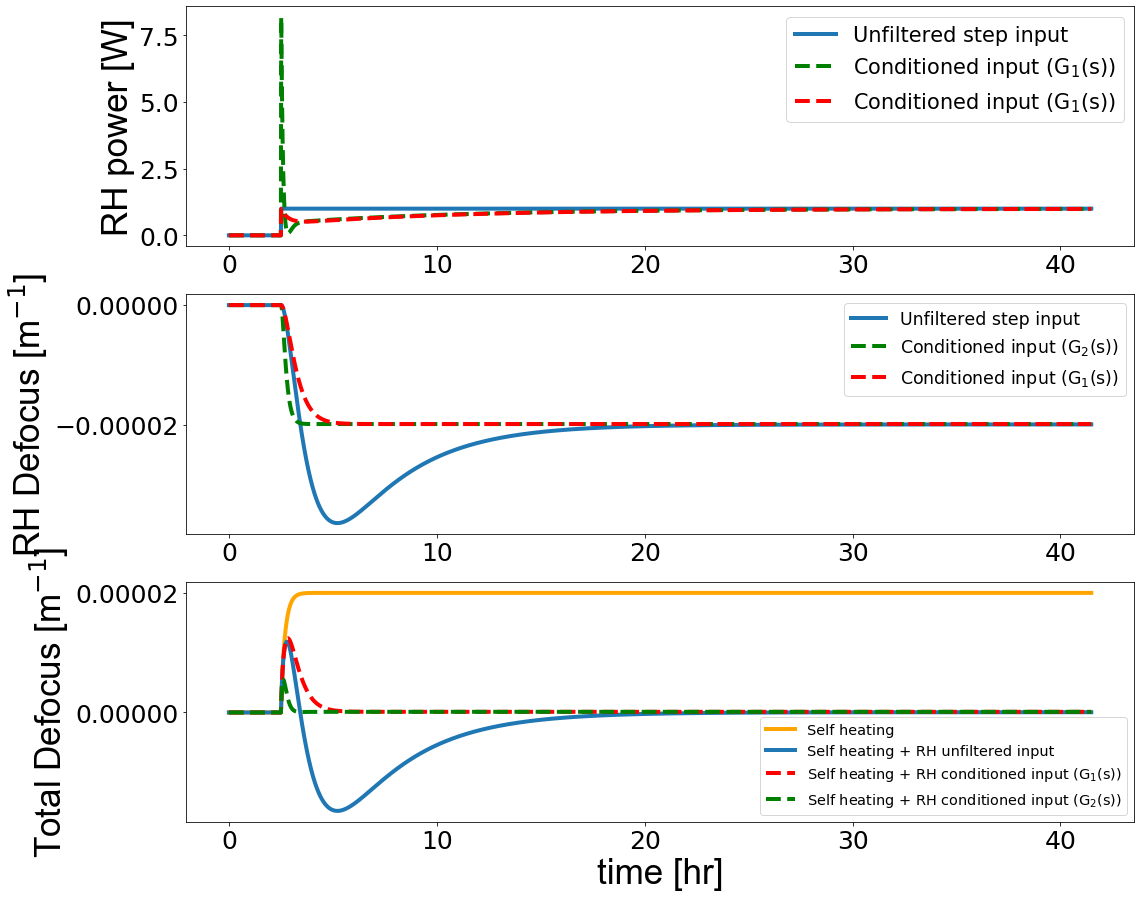

In [149]:
fig = plt.figure(figsize=(17,15))
plt.subplot(311)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='Unfiltered step input')
plt.plot(t_new/3600, y_inp_inv_L,'--', linewidth = lin_thickness, color = 'green',label='Conditioned input (G$_{1}$(s))')
plt.plot(t_new/3600, y_inp_inv_H,'--', linewidth = lin_thickness,color = 'red', label='Conditioned input (G$_{1}$(s))')
plt.ylabel('RH power [W]')
#plt.title('RH responses')
plt.legend(fontsize='small')
plt.subplot(312)
plt.ylabel('RH Defocus [m$^{-1}$]')
plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'Unfiltered step input')
plt.plot(t_new/3600,-y_mod_sim_inv_L,'--', linewidth = lin_thickness,color='green',label ='Conditioned input (G$_{2}$(s))')
plt.plot(t_new/3600,-y_mod_sim_inv_H,'--', linewidth = lin_thickness,color='red',label ='Conditioned input (G$_{1}$(s))')
plt.legend(fontsize='x-small',loc='upper right')
plt.subplot(313)
plt.plot(t_new/3600,y_sh_resp*20e-6, linewidth = lin_thickness,color='orange',label ='Self heating')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim,linewidth = lin_thickness,label='Self heating + RH unfiltered input',color='C0')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_H,'--',linewidth = lin_thickness,label='Self heating + RH conditioned input (G$_{1}$(s))',color='red')
plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv_L,'--',linewidth = lin_thickness,label='Self heating + RH conditioned input (G$_{2}$(s))',color='green')
plt.ylabel('Total Defocus [m$^{-1}$]')
plt.xlabel('time [hr]')
plt.legend(fontsize='xx-small')
fig.savefig(thesis_dir+'IRHF_compare_all.pdf')

In [150]:
max(abs(y_sh_resp*20e-6 -y_mod_sim_inv*9))

NameError: name 'y_mod_sim_inv' is not defined

In [31]:
y_sh_resp[-1]*20e-6-y_mod_sim_inv[-1]

NameError: name 'y_mod_sim_inv' is not defined

# G$_{1}$(s) -> The "response function"

Text(0.5, 0, 'Frequency [Hz]')

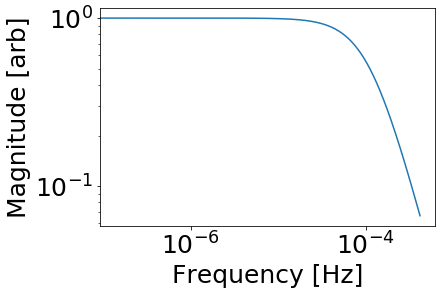

In [32]:
#For the above scenario we have the following G_s (a double pole low pass at 1.113e-4)
G_1 = signal.ZerosPolesGain([], [-2.0*np.pi*.0001113129672, -2.0*np.pi*.0001113129672],1)
F_5, H_5 = signal.freqresp(G_1,F*(Fs/2.0))
k_upd = 1/abs(H_5[0])
G_1 = signal.ZerosPolesGain([], [-2.0*np.pi*.0001113129672, -2.0*np.pi*.0001113129672],k_upd)
plt.loglog(F_5/(2*np.pi), abs(H_5)*k_upd, label='Fitted zpk Filter')
plt.ylabel('Magnitude [arb]')
plt.xlabel('Frequency [Hz]')

#### Deriving the above filter is achieved by assuming a double pole solution. We are using poles in order to reduce the gain at relatively high frequency (to avoid implementing a unstable and unphysical filter. The reason we need two is to balance out the number of poles and zeros. The value of the chosen pole frequency is achieved by setting the ratio of the poles to zeros equal to 1.

# Alternative response function (G$_{2}$(s) w/ self heating?)

## To preface this discussion, the 2nd order low pass filter appears to be one of two solutions: 
    ## At Hanford we use the 2nd order low pass (G$_{1}$(s) but as of this moment is not used to perform dynamic thermal compensation.
    ## At Livinston they use the self heating response to inform the final form of their filter

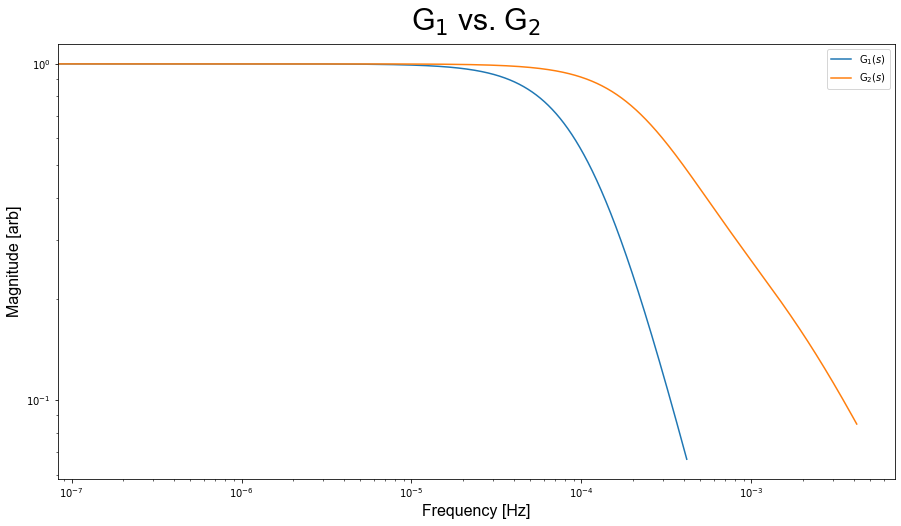

In [434]:
fig2 = plt.figure(figsize=(15,8))
plt.loglog(F_5/(2*np.pi), abs(H_5)*k_upd, label='G$_{1}(s)$')
plt.loglog(F_com/(2*np.pi), abs(H_com)*k_new_com, label='G$_{2}(s)$')
plt.ylabel('Magnitude [arb]')
plt.xlabel('Frequency [Hz]')
plt.title('G$_{1}$ vs. G$_{2}$')
plt.legend()

## The Livingston filter is what we will construct here. To do that, we will first attempt multiplying G$_{2}$(s) (the self heating response) to H$^{-1}$(s)

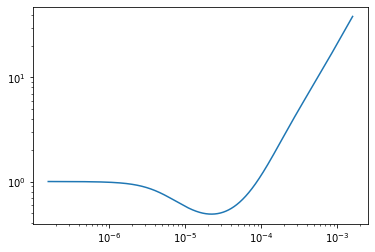

In [435]:
FILT_LIV_zeros= np.append(fit_zeros_com,fit_poles)
FILT_LIV_poles= np.append(fit_poles_com,fit_zeros)
FILT_LIV = signal.ZerosPolesGain(FILT_LIV_zeros, FILT_LIV_poles, 1)
_ , H_G2 = signal.freqresp(FILT_LIV,np.arange(10e-7,10e-3,1e-7))
plt.loglog(np.arange(10e-7,10e-3,1e-7)/(2*np.pi), abs(H_G2)/abs(H_G2[0]))

## Not enough zeros to set high frequency to unity gain (would be an unphysical without one more pole)

In [438]:
FILT_LIV_poles_2= np.append(FILT_LIV_poles,-0.00020951281288038756)

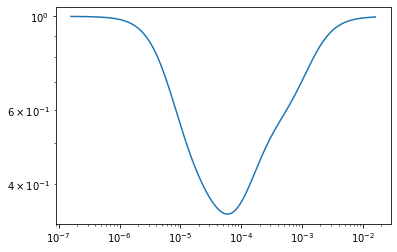

In [439]:
FILT_LIV = signal.ZerosPolesGain(FILT_LIV_zeros, FILT_LIV_poles_2, 1)
_ , H_G2 = signal.freqresp(FILT_LIV,freq)
plt.loglog(freq/(2*np.pi), abs(H_G2)/abs(H_G2[0]))

In [440]:
[ _ ,y_G2, _] = signal.lsim(FILT_LIV, unit_step, t_new)

In [441]:
[ _ ,y_G2_time, _] = signal.lsim(model_zpk, y_G2, t_new)

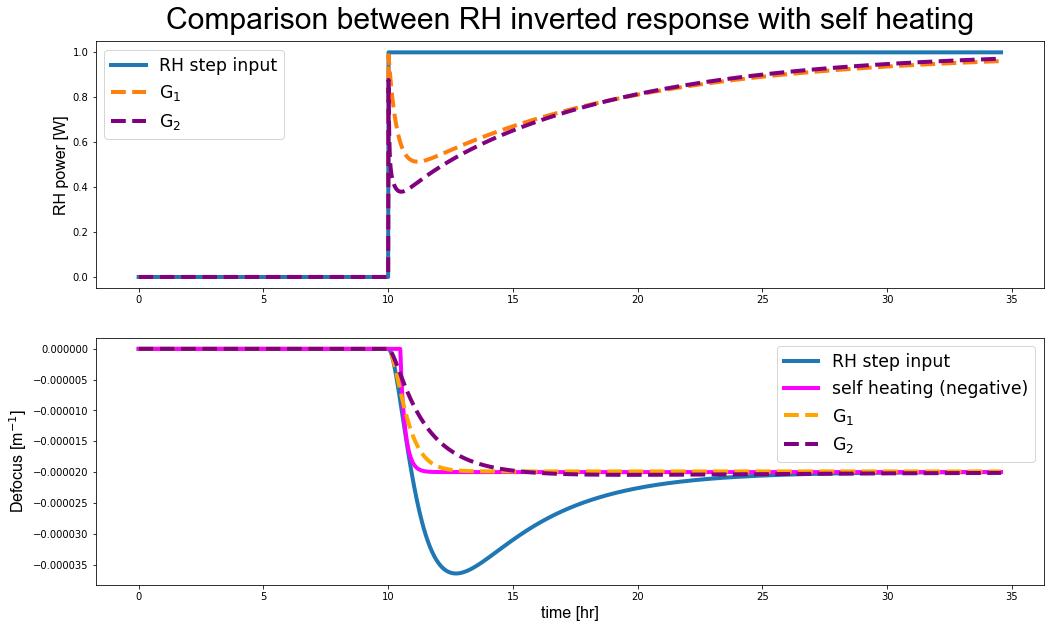

In [445]:
fig = plt.figure(figsize=(17,10))
plt.subplot(211)
plt.plot(t_new/3600, unit_step,linewidth = lin_thickness,label='RH step input')
plt.plot(t_new/3600, y_inp_inv,'--', linewidth = lin_thickness,label='G$_{1}$')
plt.plot(t_new/3600,y_G2,'--', linewidth = lin_thickness,color='purple',label ='G$_{2}$')
plt.ylabel('RH power [W]')
plt.title('Comparison between RH inverted response with self heating')
plt.legend(fontsize='xx-large')
plt.subplot(212)
plt.plot(t_new/3600,-y_mod_sim, linewidth = lin_thickness,label = 'RH step input')
plt.plot(t_new/3600,-y_sh_resp*20e-6, linewidth = lin_thickness,color='magenta',label ='self heating (negative)')
plt.plot(t_new/3600,-y_mod_sim_inv,'--', linewidth = lin_thickness,color='orange',label ='G$_{1}$')
#plt.plot(t_new/3600,y_sh_resp*20e-6 -y_mod_sim_inv,linewidth = lin_thickness,label='diff (orange - green)',color='red')
plt.plot(t_new/3600,-y_G2_time,'--', linewidth = lin_thickness,color='purple',label ='G$_{2}$')
plt.ylabel('Defocus [m$^{-1}$]')
plt.xlabel('time [hr]')
plt.legend(fontsize='xx-large')
fig.savefig('G1_and_G2.pdf',bbox_inches='tight')